# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [57]:
# import libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import re
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A55964\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A55964\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A55964\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
# load data from database
engine = create_engine('sqlite:///{}'.format('Message.db'))
df = pd.read_sql_table('Messages_cleaned',engine)

# X represents the independent variables, or the features, that are used to predict the output variable Y
#X = df[['id','message','original','genre']]
X= df['message'].values
#Y, on the other hand, represents the dependent variable, or the target, that the model is trying to predict.
Y = df.drop(columns=['id','message','original','genre'])
X

array(['Weather update - a cold front from Cuba that could pass over Haiti',
       'Is the Hurricane over or is it not over',
       'Looking for someone but no name', ...,
       "Proshika, operating in Cox's Bazar municipality and 5 other unions, Ramu and Chokoria, assessment, 5 kg rice, 1,5 kg lentils to 700 families.",
       'Some 2,000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt.',
       'A radical shift in thinking came about as a result of this meeting, recognizing that HIV/AIDS is at the core of the humanitarian crisis and identifying the crisis itself as a function of the HIV/AIDS pandemic.'],
      dtype=object)

In [80]:
Y

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#Let's now check the unique values in each of our targets columns
for col in Y.columns:
     print("Column {} contain values {}".format(Y[col].name,Y[col].unique()))


Column related contain values [1 0]
Column request contain values [0 1]
Column offer contain values [0 1]
Column aid_related contain values [0 1]
Column medical_help contain values [0 1]
Column medical_products contain values [0 1]
Column search_and_rescue contain values [0 1]
Column security contain values [0 1]
Column military contain values [0 1]
Column child_alone contain values [0]
Column water contain values [0 1]
Column food contain values [0 1]
Column shelter contain values [0 1]
Column clothing contain values [0 1]
Column money contain values [0 1]
Column missing_people contain values [0 1]
Column refugees contain values [0 1]
Column death contain values [0 1]
Column other_aid contain values [0 1]
Column infrastructure_related contain values [0 1]
Column transport contain values [0 1]
Column buildings contain values [0 1]
Column electricity contain values [0 1]
Column tools contain values [0 1]
Column hospitals contain values [0 1]
Column shops contain values [0 1]
Column aid_

In [28]:
# we can also check what data type those columns are made of
Y.dtypes

related                   int64
request                   int64
offer                     int64
aid_related               int64
medical_help              int64
medical_products          int64
search_and_rescue         int64
security                  int64
military                  int64
child_alone               int64
water                     int64
food                      int64
shelter                   int64
clothing                  int64
money                     int64
missing_people            int64
refugees                  int64
death                     int64
other_aid                 int64
infrastructure_related    int64
transport                 int64
buildings                 int64
electricity               int64
tools                     int64
hospitals                 int64
shops                     int64
aid_centers               int64
other_infrastructure      int64
weather_related           int64
floods                    int64
storm                     int64
fire    

In [55]:
#clean related column
# It looks like the "related" category can take 1, 0 or 2 in our dataset.
# we decide to replace it with 1
Y.related.replace(2,1,inplace=True)


### 2. Write a tokenization function to process your text data

In [30]:
def tokenize(text):

    # Normalize text
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

    # Tokenize text
    words = word_tokenize(text)

    # Remove stop words
    words = [w for w in words if w not in stopwords.words("english")]

    # Reduce words to their stems
    words = [PorterStemmer().stem(w) for w in words]

    # Reduce words to their root form
    words = [WordNetLemmatizer().lemmatize(w) for w in words]

    return words

In [32]:
#Testing the tokenize function
tokenized = tokenize(X[3])

print(tokenized)
print(X[3])

['un', 'report', 'leogan', '80', '90', 'destroy', 'hospit', 'st', 'croix', 'function', 'need', 'suppli', 'desper']
UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.


### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [33]:
# build pipeline
pipeline = Pipeline([
    ('vect',CountVectorizer(tokenizer=tokenize)),
    ('tfidf',TfidfTransformer()),
    ('clf',MultiOutputClassifier(RandomForestClassifier())),
])

pipeline.set_params(clf__estimator__verbose=1)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x00000242839A0700>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(verbose=1)))])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)
model = pipeline.fit(X_train, y_train)

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.9s finis

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Target: related
-----------
True Negative: 487
False Positive: 729
False Negative: 183
True Positive: 3845




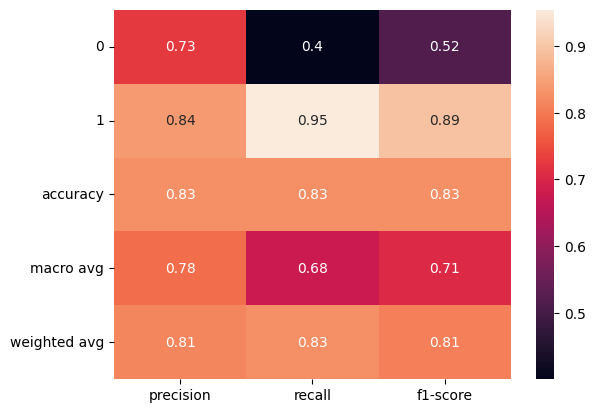

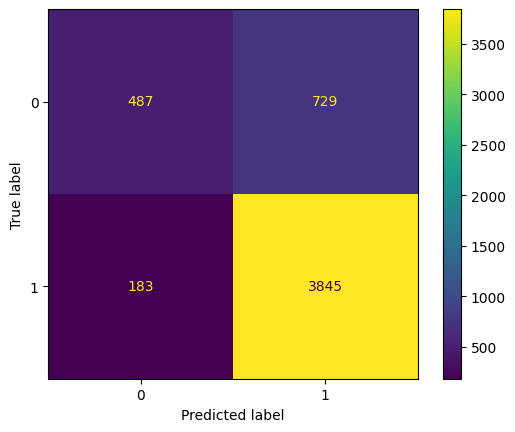

Target: request
-----------
True Negative: 4264
False Positive: 82
False Negative: 462
True Positive: 436




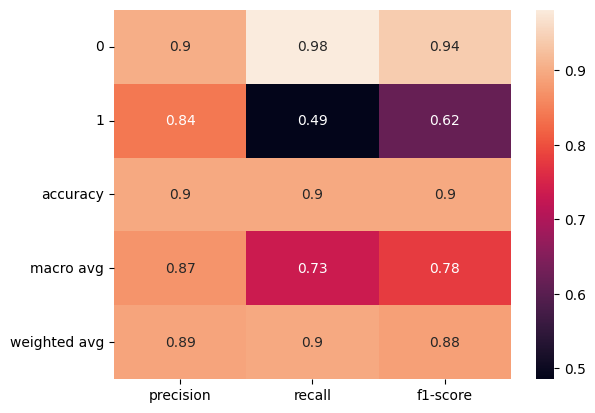

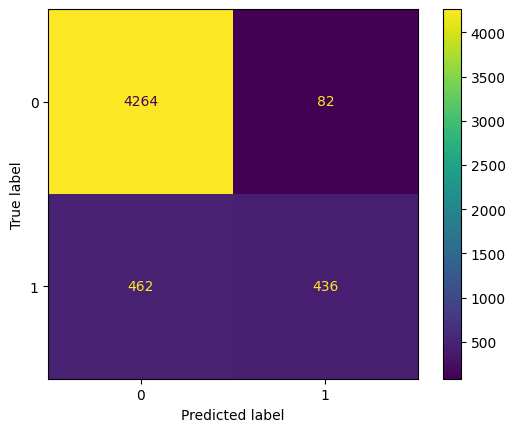

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Target: offer
-----------
True Negative: 5215
False Positive: 0
False Negative: 29
True Positive: 0




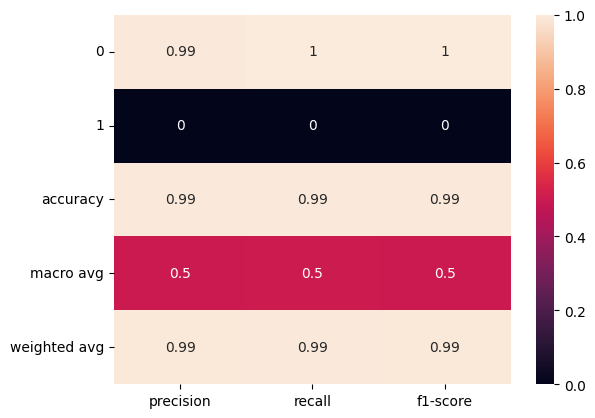

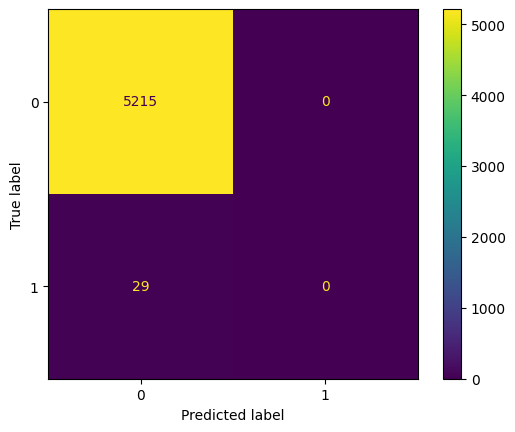

Target: aid_related
-----------
True Negative: 2588
False Positive: 482
False Negative: 674
True Positive: 1500




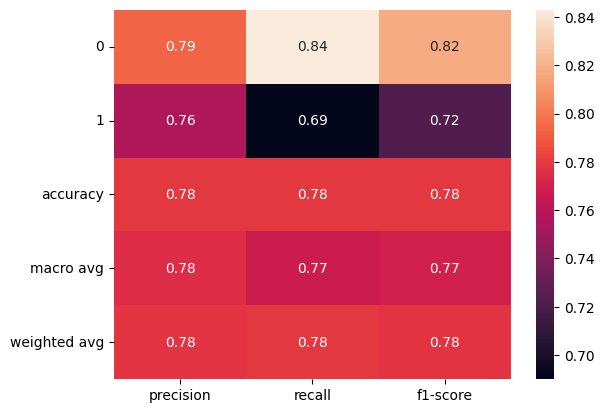

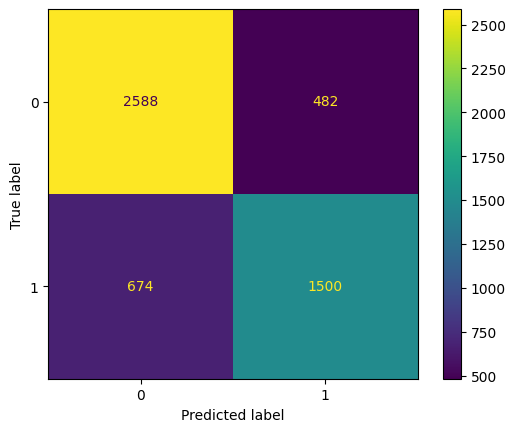

Target: medical_help
-----------
True Negative: 4804
False Positive: 11
False Negative: 389
True Positive: 40




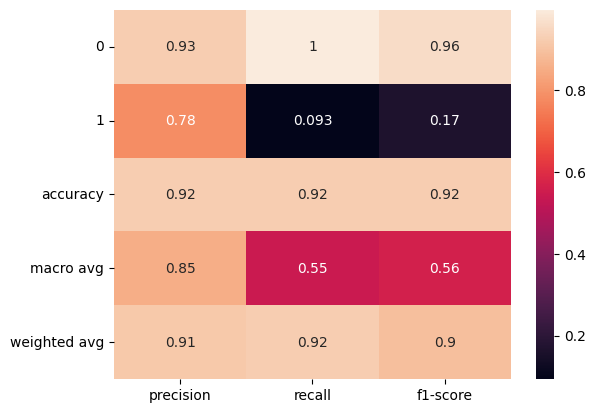

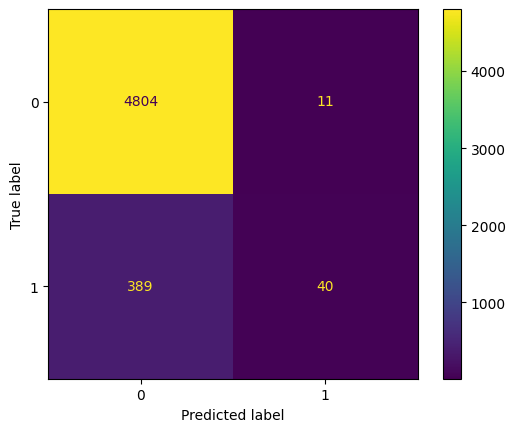

Target: medical_products
-----------
True Negative: 4968
False Positive: 5
False Negative: 256
True Positive: 15




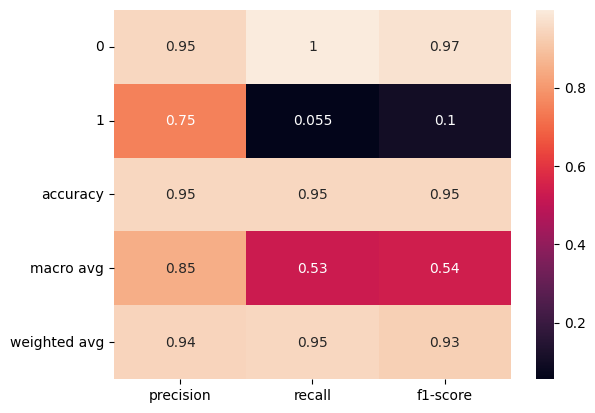

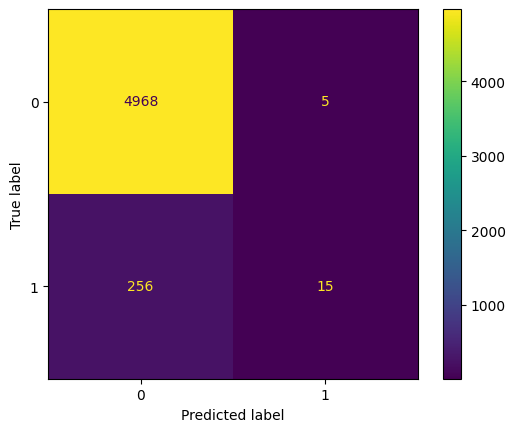

Target: search_and_rescue
-----------
True Negative: 5117
False Positive: 3
False Negative: 122
True Positive: 2




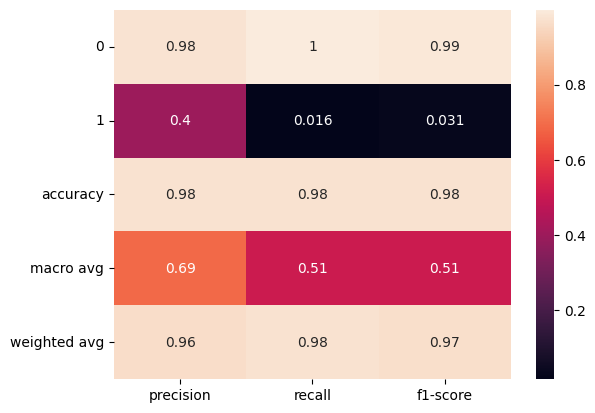

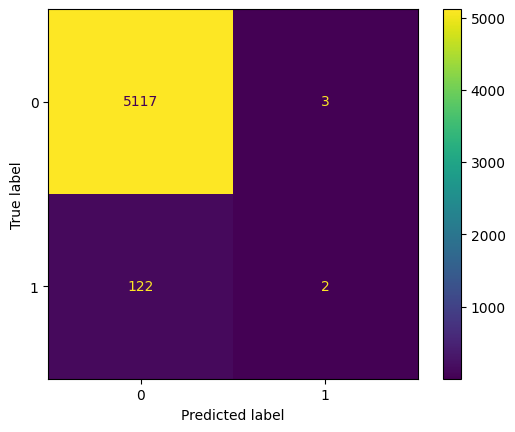

Target: security
-----------
True Negative: 5159
False Positive: 0
False Negative: 84
True Positive: 1




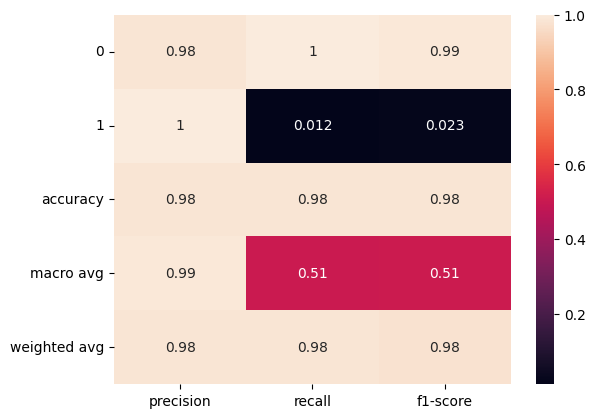

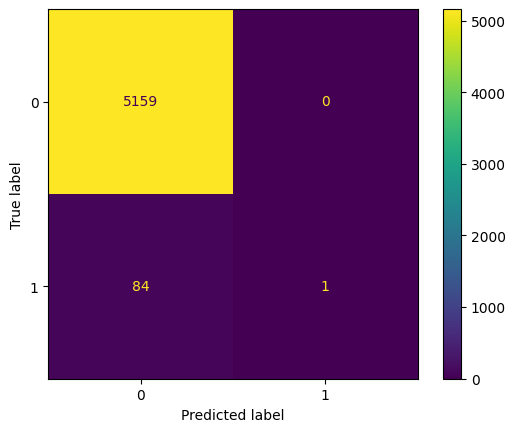

Target: military
-----------
True Negative: 5060
False Positive: 4
False Negative: 171
True Positive: 9




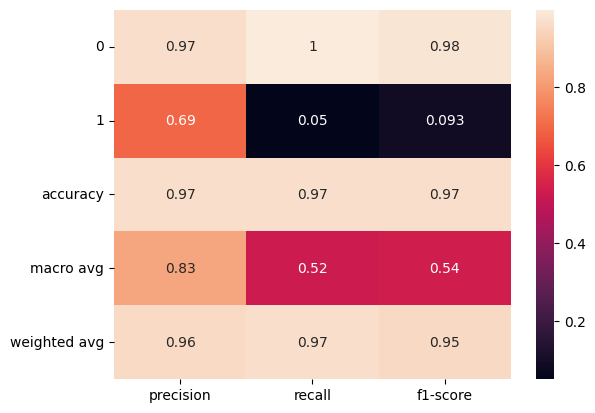

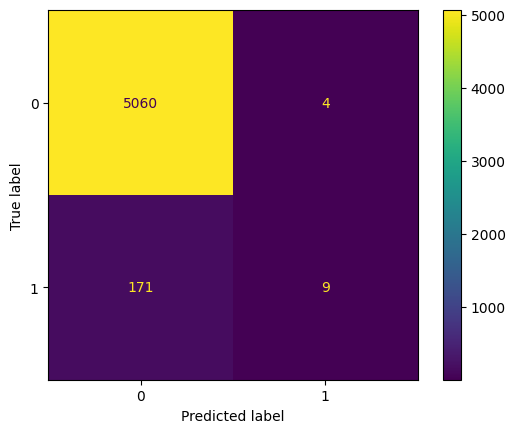

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Target: child_alone
-----------
True Negative: 5244
False Positive: 0
False Negative: 0
True Positive: 0




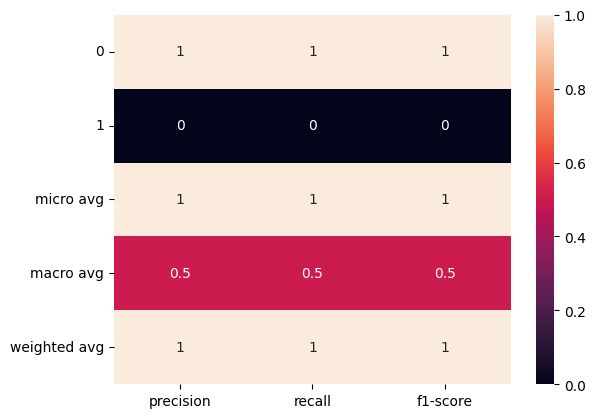

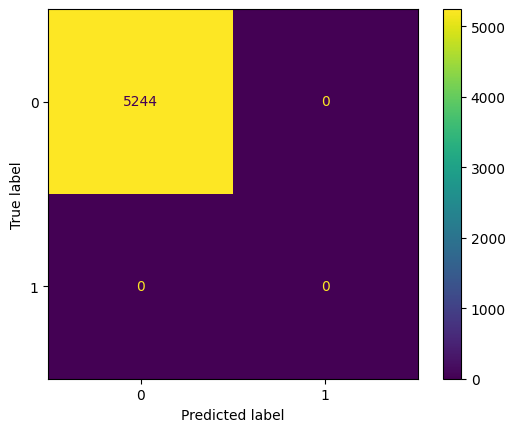

Target: water
-----------
True Negative: 4898
False Positive: 13
False Negative: 205
True Positive: 128




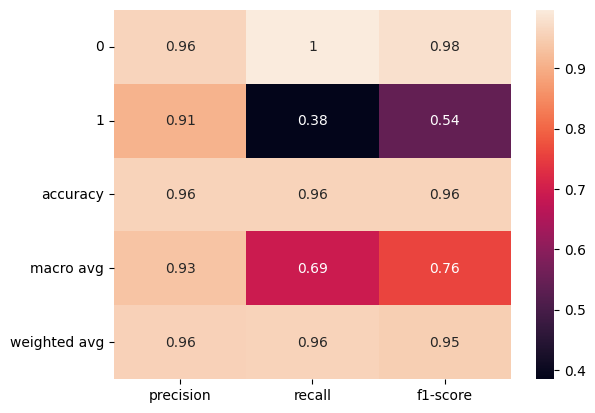

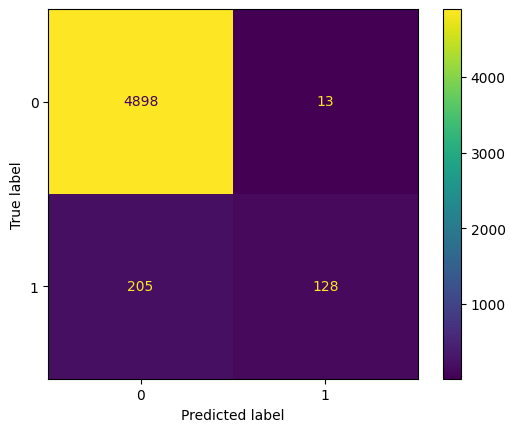

Target: food
-----------
True Negative: 4590
False Positive: 57
False Negative: 228
True Positive: 369




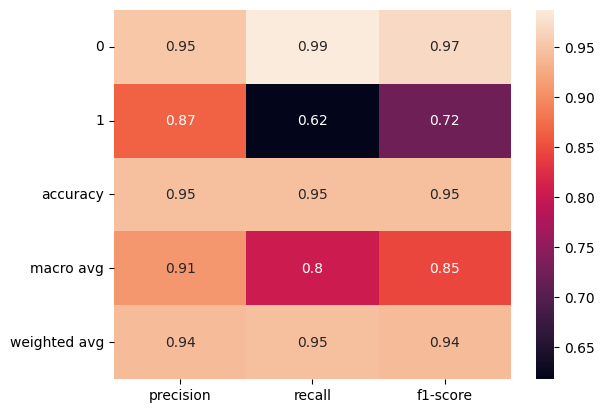

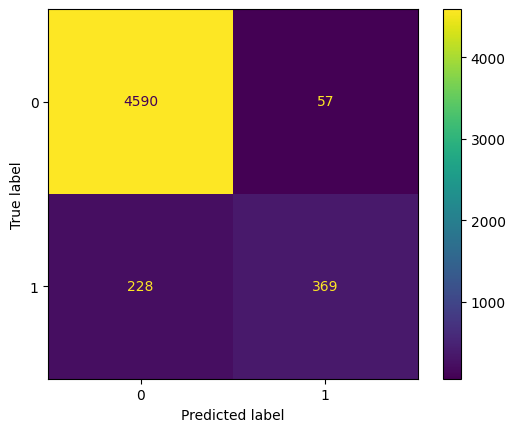

Target: shelter
-----------
True Negative: 4745
False Positive: 50
False Negative: 279
True Positive: 170




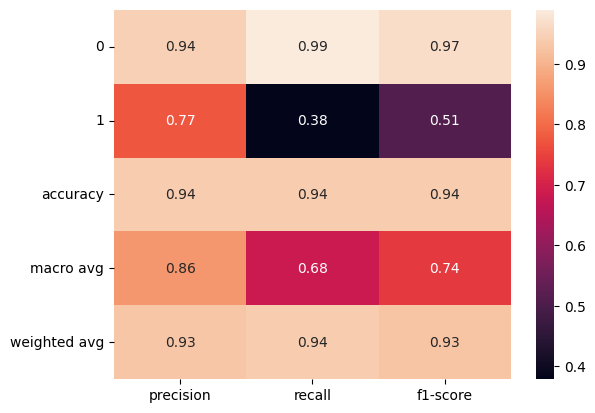

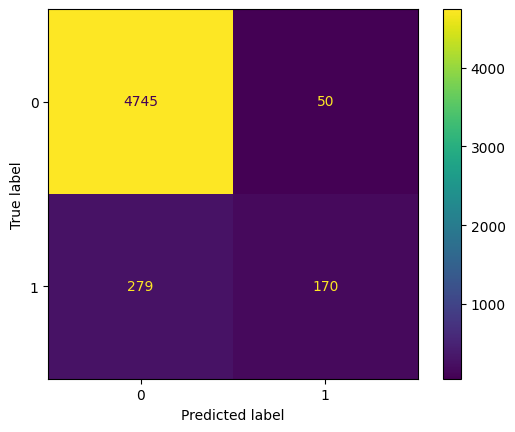

Target: clothing
-----------
True Negative: 5167
False Positive: 1
False Negative: 63
True Positive: 13




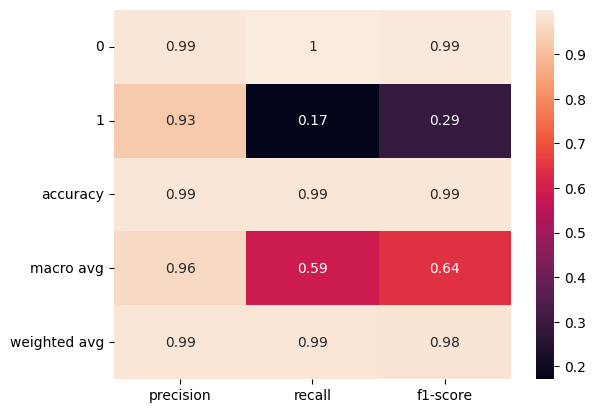

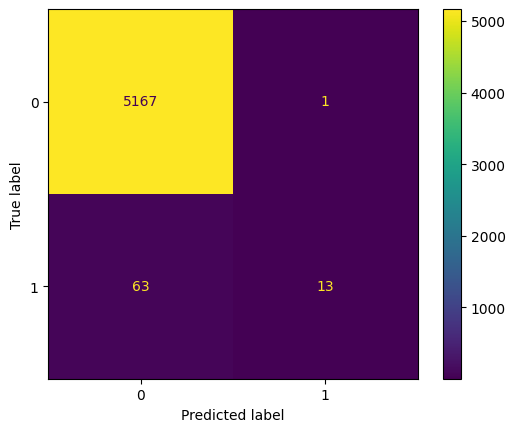

Target: money
-----------
True Negative: 5127
False Positive: 1
False Negative: 113
True Positive: 3




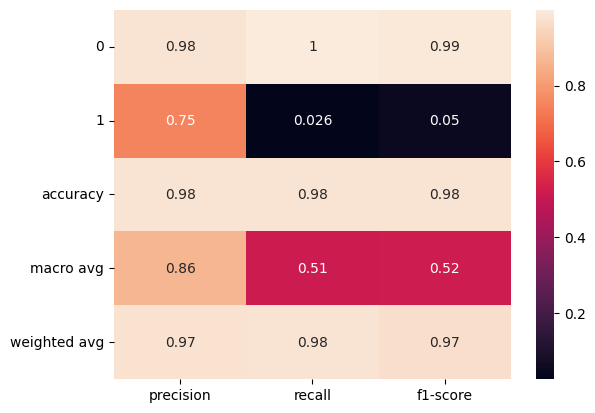

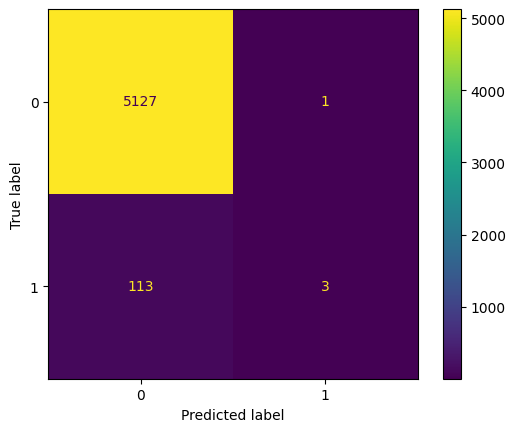

Target: missing_people
-----------
True Negative: 5194
False Positive: 0
False Negative: 49
True Positive: 1




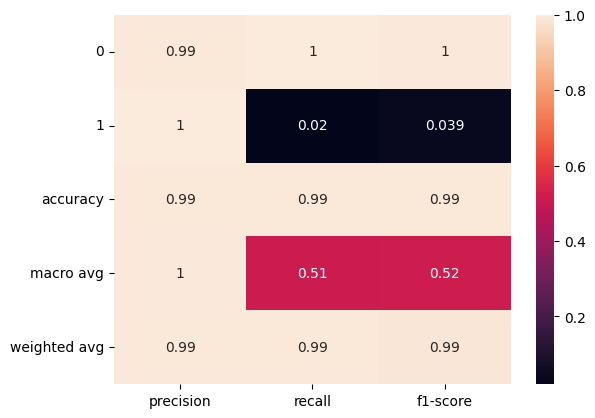

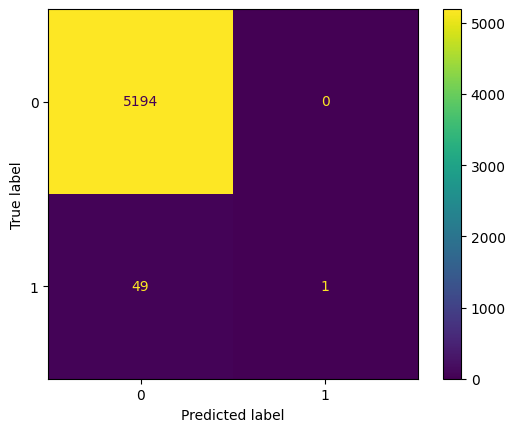

Target: refugees
-----------
True Negative: 5076
False Positive: 6
False Negative: 160
True Positive: 2




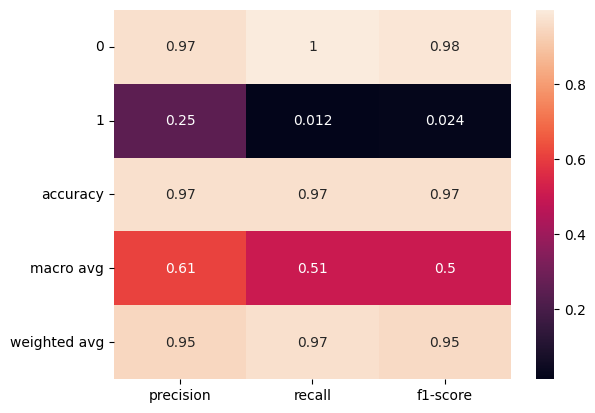

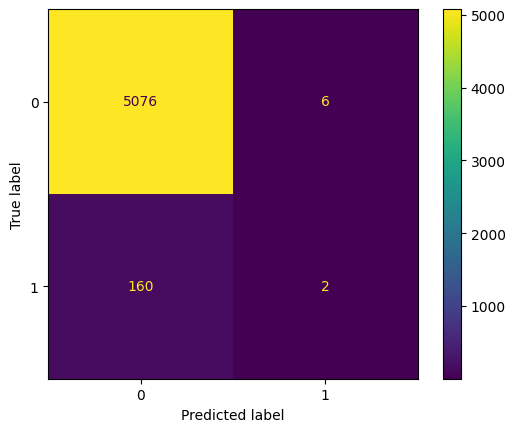

Target: death
-----------
True Negative: 4993
False Positive: 12
False Negative: 201
True Positive: 38




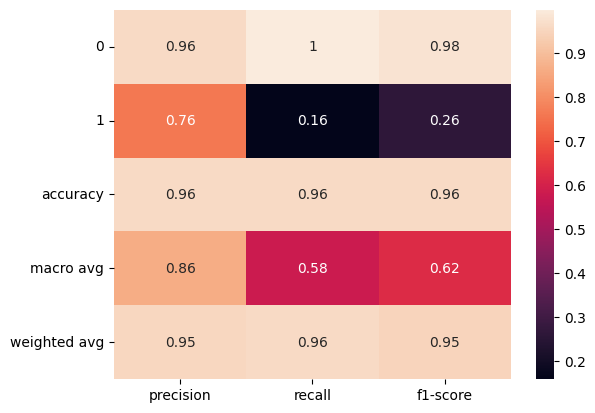

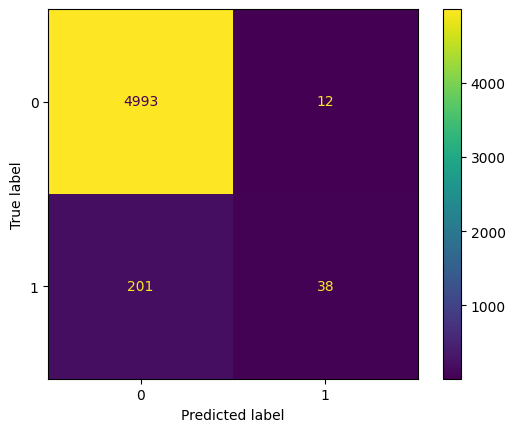

Target: other_aid
-----------
True Negative: 4560
False Positive: 15
False Negative: 650
True Positive: 19




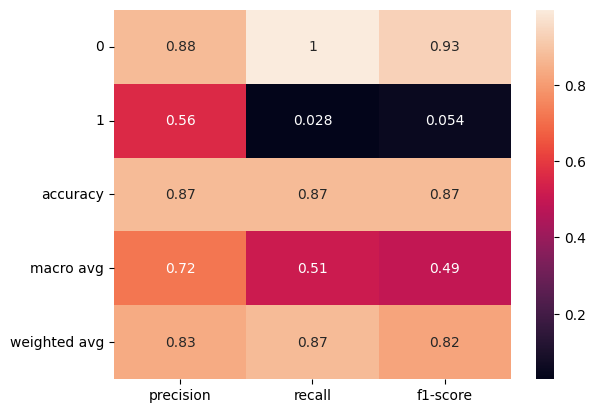

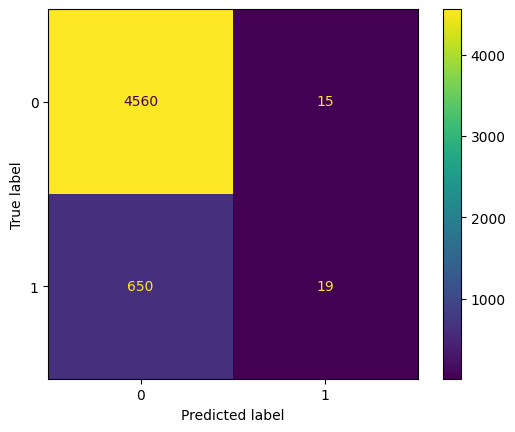

Target: infrastructure_related
-----------
True Negative: 4923
False Positive: 3
False Negative: 316
True Positive: 2




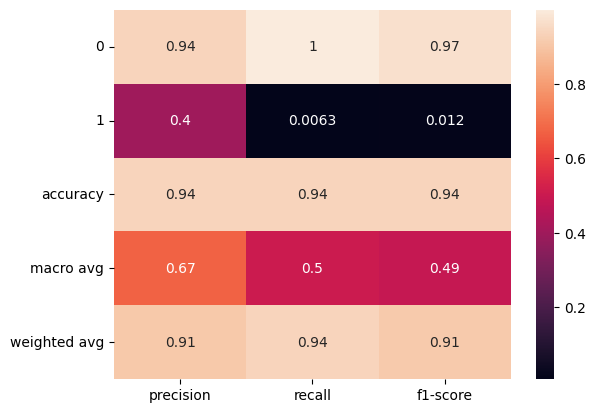

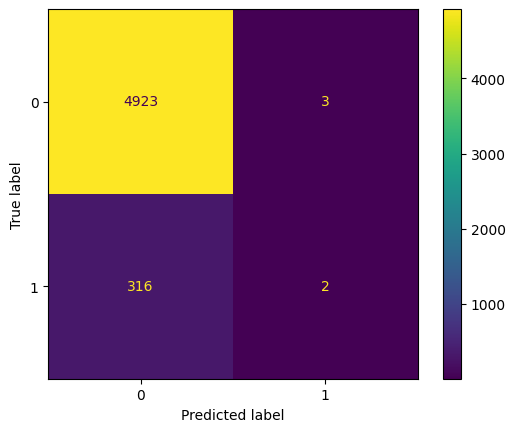

Target: transport
-----------
True Negative: 5003
False Positive: 5
False Negative: 216
True Positive: 20




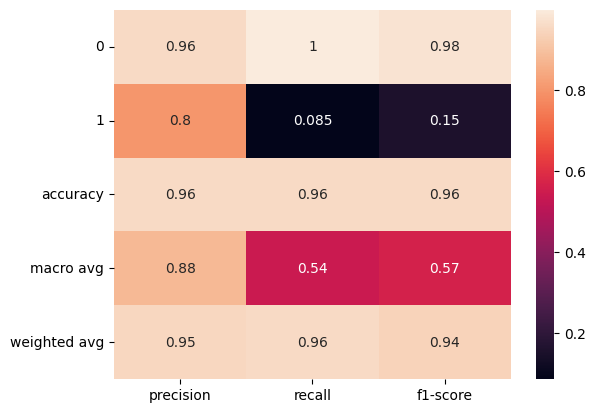

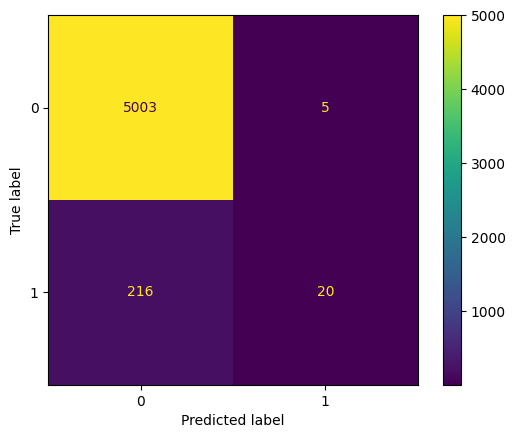

Target: buildings
-----------
True Negative: 4998
False Positive: 14
False Negative: 200
True Positive: 32




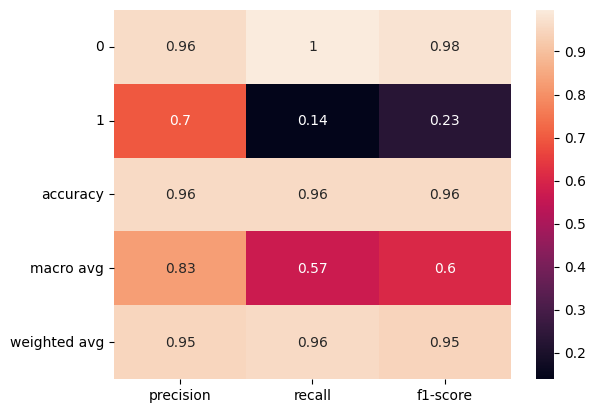

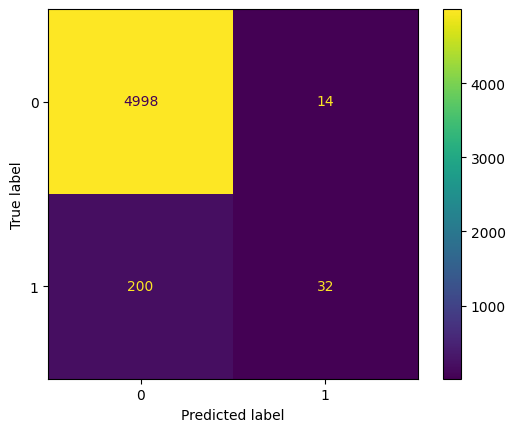

Target: electricity
-----------
True Negative: 5122
False Positive: 4
False Negative: 109
True Positive: 9




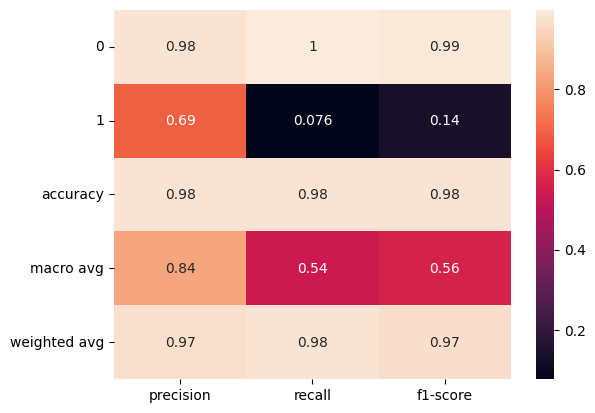

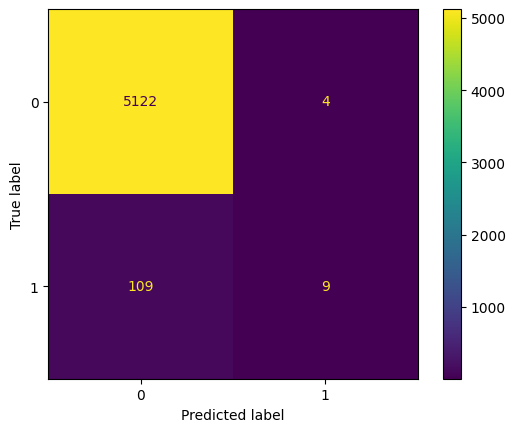

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Target: tools
-----------
True Negative: 5214
False Positive: 0
False Negative: 30
True Positive: 0




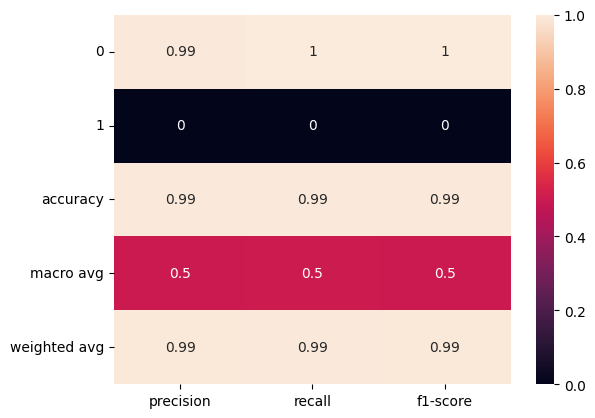

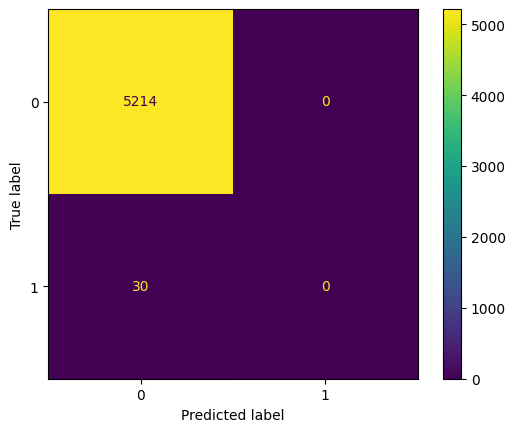

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Target: hospitals
-----------
True Negative: 5176
False Positive: 0
False Negative: 68
True Positive: 0




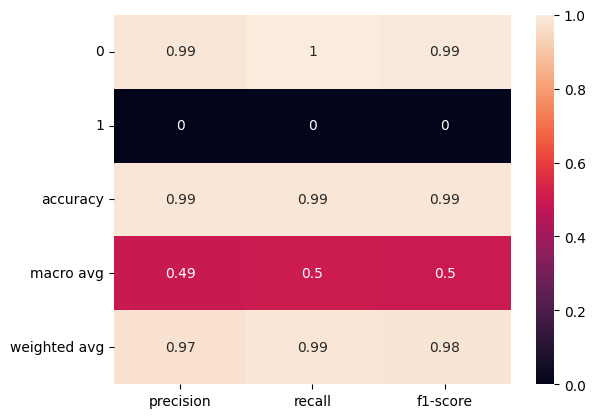

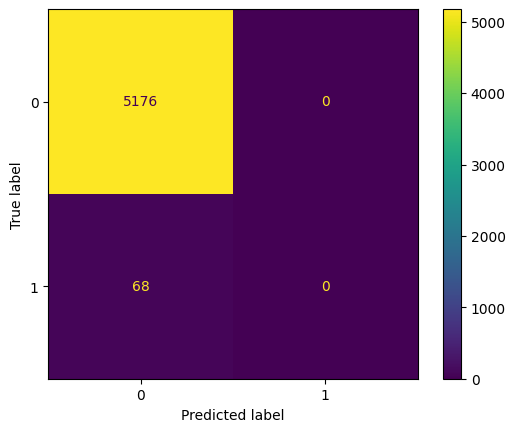

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Target: shops
-----------
True Negative: 5220
False Positive: 0
False Negative: 24
True Positive: 0




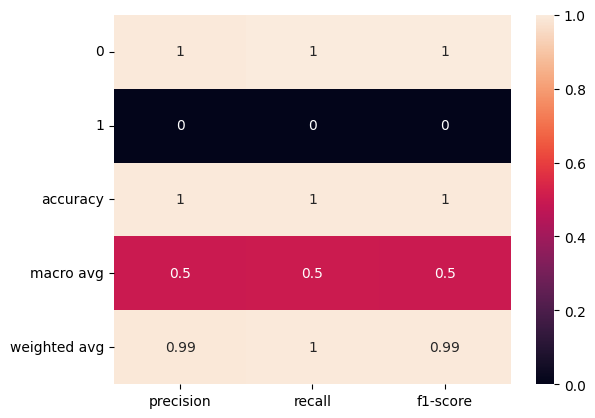

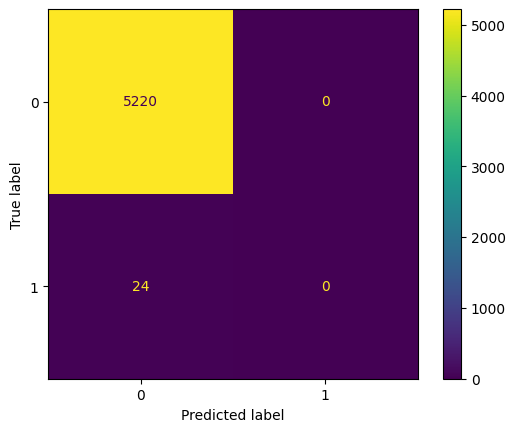

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Target: aid_centers
-----------
True Negative: 5188
False Positive: 0
False Negative: 56
True Positive: 0




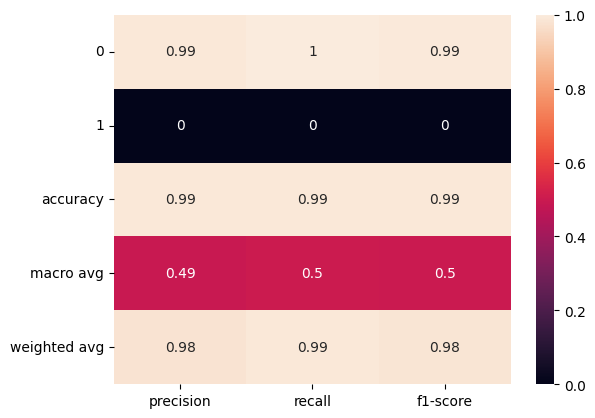

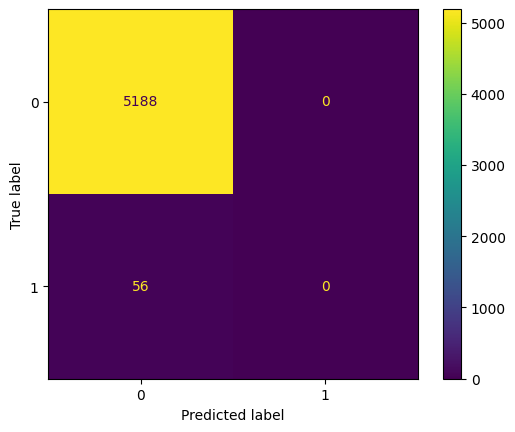

Target: other_infrastructure
-----------
True Negative: 5039
False Positive: 4
False Negative: 201
True Positive: 0




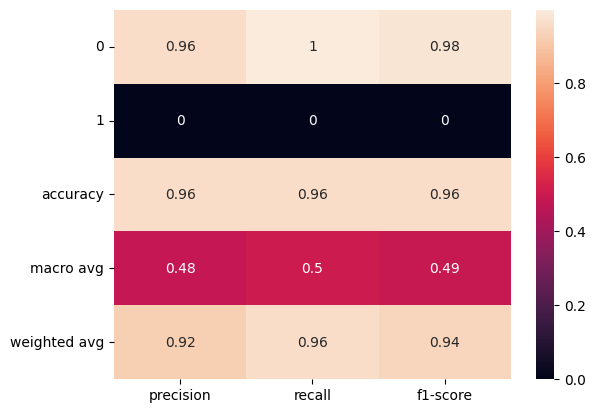

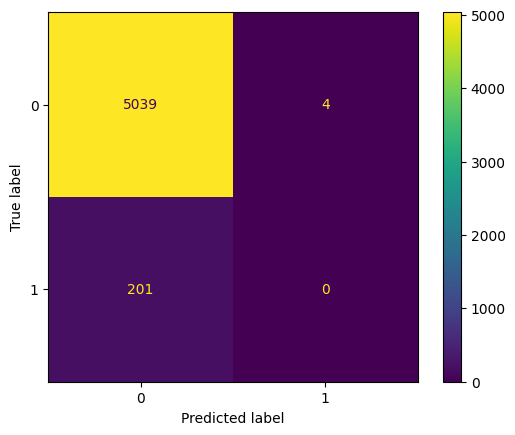

Target: weather_related
-----------
True Negative: 3591
False Positive: 188
False Negative: 384
True Positive: 1081




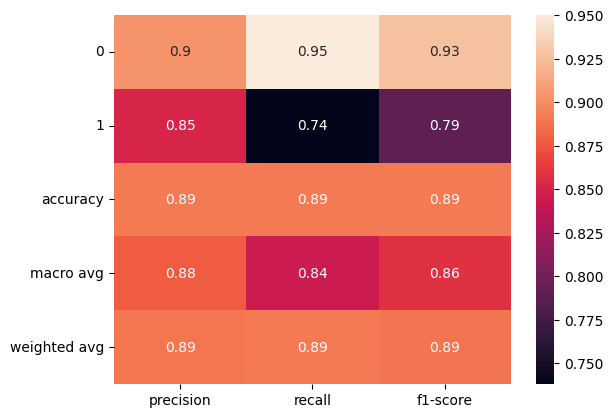

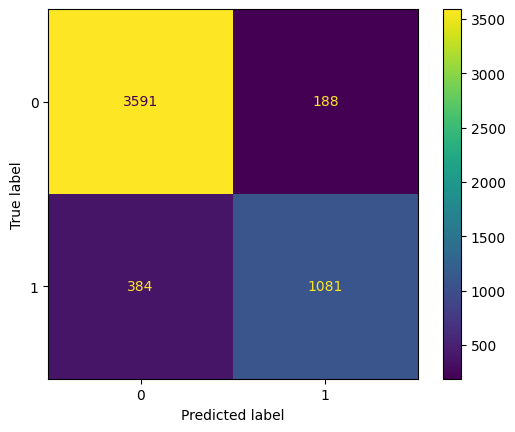

Target: floods
-----------
True Negative: 4798
False Positive: 22
False Negative: 203
True Positive: 221




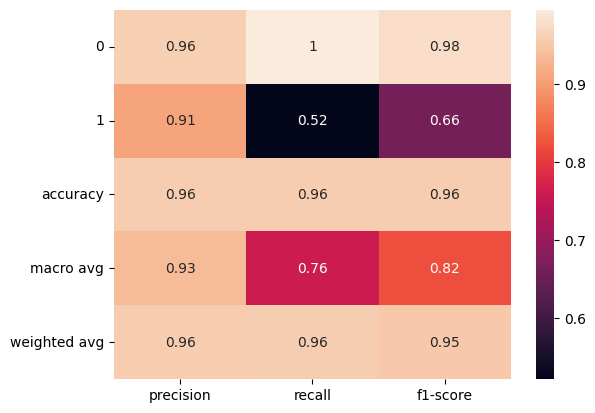

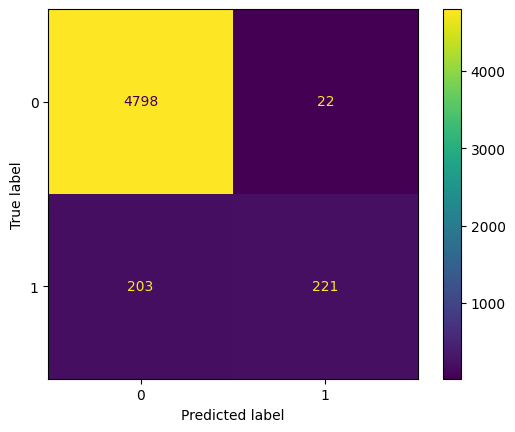

Target: storm
-----------
True Negative: 4697
False Positive: 68
False Negative: 228
True Positive: 251




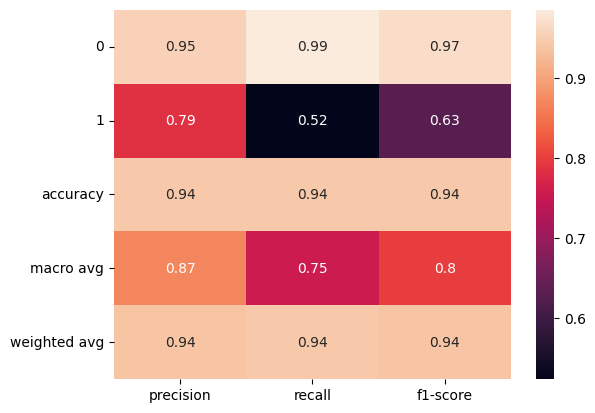

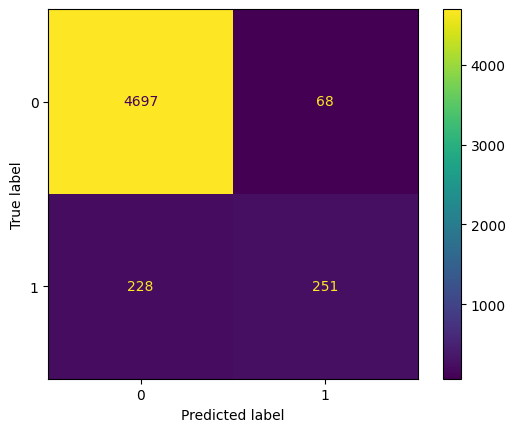

Target: fire
-----------
True Negative: 5192
False Positive: 0
False Negative: 50
True Positive: 2




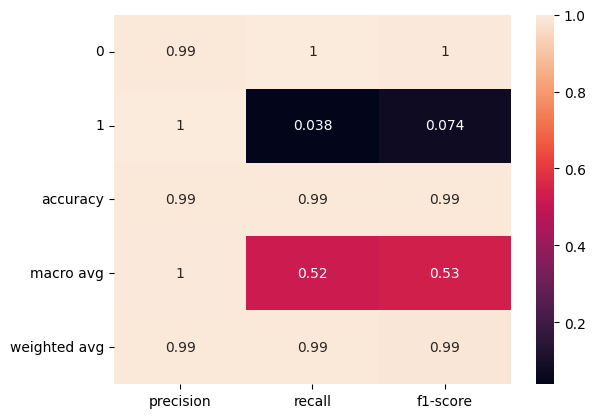

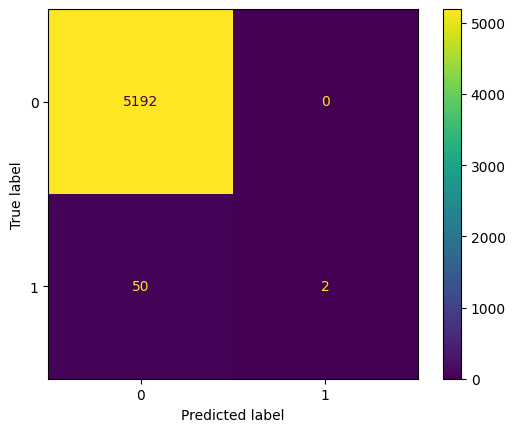

Target: earthquake
-----------
True Negative: 4681
False Positive: 56
False Negative: 91
True Positive: 416




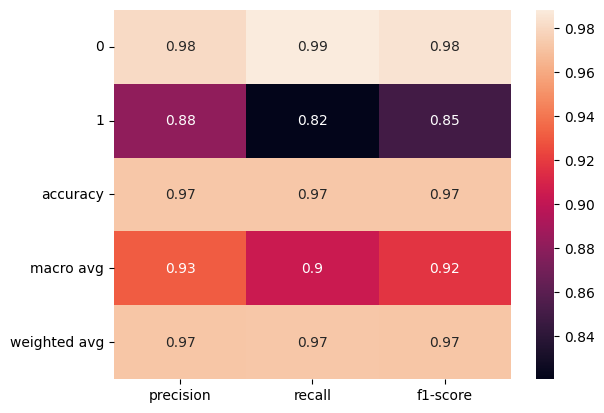

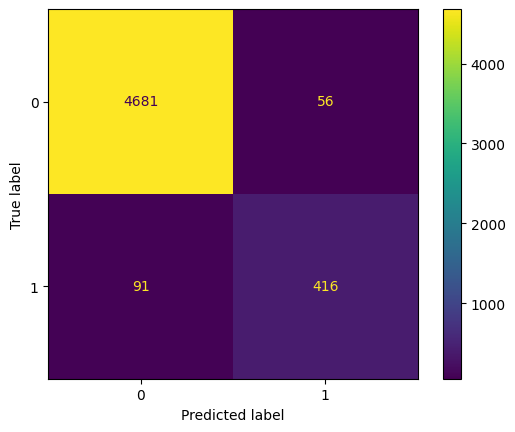

Target: cold
-----------
True Negative: 5145
False Positive: 4
False Negative: 84
True Positive: 11




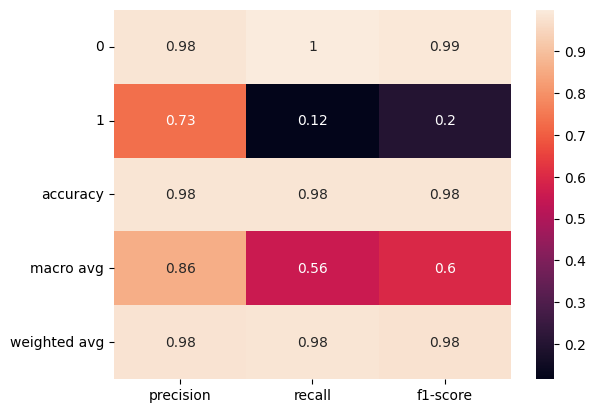

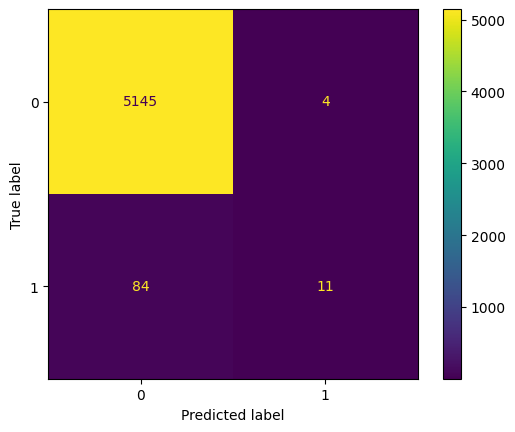

Target: other_weather
-----------
True Negative: 4971
False Positive: 3
False Negative: 262
True Positive: 8




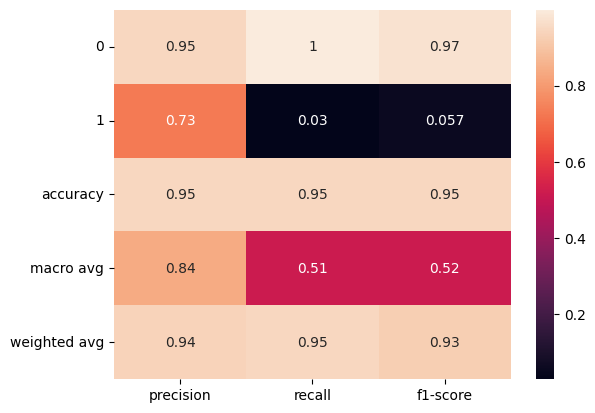

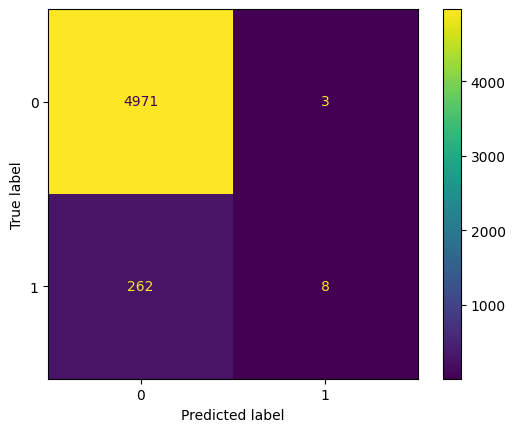

Target: direct_report
-----------
True Negative: 4124
False Positive: 89
False Negative: 651
True Positive: 380




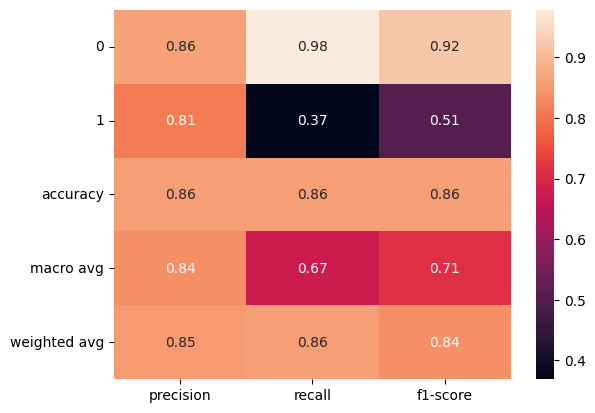

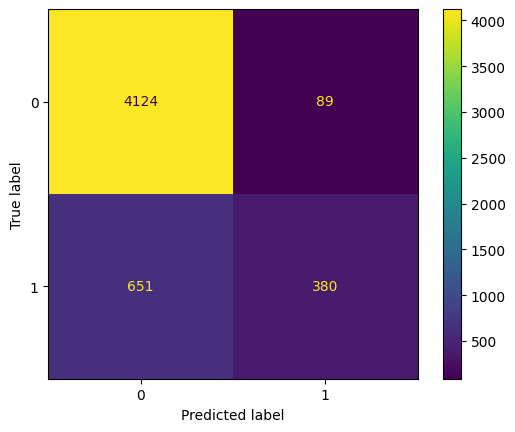

In [36]:
predicted = model.predict(X_test)
labels = np.unique(predicted)
targets = Y.columns

i=0
for col in targets:

    class_report = classification_report(y_test[col].to_numpy(), predicted[:,i],labels=labels,output_dict=True)
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)

    tn, fp, fn, tp = confusion_matrix(y_test[col].to_numpy(), predicted[:,i],labels=labels).ravel()
    print("Target: {}\n-----------\nTrue Negative: {}\nFalse Positive: {}\nFalse Negative: {}\nTrue Positive: {}\n\n".format(col,tn, fp, fn, tp))
    cm = confusion_matrix(y_test[col].to_numpy(), predicted[:,i],labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    
    
    i+=1

In [12]:
class_report_full = classification_report(y_test, predicted,target_names=targets,output_dict=True)
df_class_report = pd.DataFrame(class_report_full).transpose()

print(df_class_report)
#class_report_full = classification_report(y_test, predicted,target_names=targets,output_dict=True)
#sns.heatmap(pd.DataFrame(class_report_full).iloc[:-1, :].T, annot=True)

                        precision    recall  f1-score  support
related                  0.838951  0.954865  0.893163   3988.0
request                  0.829268  0.499435  0.623413    885.0
offer                    0.000000  0.000000  0.000000     19.0
aid_related              0.759940  0.700371  0.728940   2156.0
medical_help             0.612245  0.074442  0.132743    403.0
medical_products         0.739130  0.062731  0.115646    271.0
search_and_rescue        0.363636  0.027397  0.050955    146.0
security                 0.000000  0.000000  0.000000     81.0
military                 0.866667  0.072222  0.133333    180.0
child_alone              0.000000  0.000000  0.000000      0.0
water                    0.883212  0.375776  0.527233    322.0
food                     0.875706  0.550622  0.676118    563.0
shelter                  0.858757  0.331155  0.477987    459.0
clothing                 0.875000  0.089744  0.162791     78.0
money                    1.000000  0.017857  0.035088  

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. 

### 6. Improve your model
Use grid search to find better parameters. 

In [14]:
#Looking at pipeline parameters to fine tune
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function tokenize at 0x0000022F29719AF0>)),
  ('tfidf', TfidfTransformer()),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier(verbose=1)))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function tokenize at 0x0000022F29719AF0>),
 'tfidf': TfidfTransformer(),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier(verbose=1)),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function __main__.tokenize(text)>,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__subl

In [15]:
parameters = {
    'clf__n_jobs':[2,4,6],
    'clf__estimator__max_depth' : [4,5,6,7,8],
    'clf__estimator__max_features': ['auto','sqrt','log2']
    }
# create grid search object   param_grid=parameters
cv = GridSearchCV(pipeline,param_grid=parameters,verbose=2)

In [45]:
cv.fit(X_train['message'], y_train)

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\A55

In [46]:
predicted = cv.predict(X_test['message'])
labels = np.unique(predicted)
print(classification_report(y_test,predicted,labels=labels))
print("\nBest parameters: {}".format(cv.best_params_))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5034
           1       0.85      0.49      0.62      1149

   micro avg       0.84      0.87      0.85      6183
   macro avg       0.84      0.72      0.76      6183
weighted avg       0.84      0.87      0.84      6183
 samples avg       0.73      0.69      0.70      6183


Best parameters: {'clf__n_jobs': 4}


c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


        precision    recall  f1-score   support

           0       0.84      0.95      0.89      5038
           1       0.82      0.46      0.59      1073

   micro avg       0.84      0.86      0.85      6111
   macro avg       0.83      0.71      0.74      6111
weighted avg       0.84      0.86      0.84      6111
 samples avg       0.72      0.69      0.69      6111


Best parameters: {'clf__n_jobs': 6}

   parameters = {
    'clf__n_jobs':[2,4,6],
    'clf__estimator__max_depth' : [4,5,6,7,8],
    'clf__estimator__max_features': ['auto','sqrt','log2']

    }
   
   
   precision    recall  f1-score   support

           0       0.76      1.00      0.86      4976
           1       0.00      0.00      0.00      1164

   micro avg       0.76      0.81      0.78      6140
   macro avg       0.38      0.50      0.43      6140
weighted avg       0.62      0.81      0.70      6140
 samples avg       0.76      0.67      0.70      6140


Best parameters: {'clf__estimator__max_depth': 4, 'clf__estimator__max_features': 'log2', 'clf__n_jobs': 2}

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [16]:
#After different Grid Search Cross validations we can now set up an improved model

pipeline.set_params(
    clf__estimator__verbose=1,
    clf__estimator__max_features ='log2',
    clf__n_jobs = 6,
    clf__estimator__n_estimators = 200
    )

model_bis = pipeline.fit(X_train['message'], y_train)

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [17]:
#A quick look at the performances
predicted_bis = model_bis.predict(X_test['message'])
class_report_bis = classification_report(y_test, predicted_bis,target_names=targets,output_dict=True)
df_class_report_bis = pd.DataFrame(class_report_bis).transpose()
print(df_class_report_bis)

                        precision    recall  f1-score  support
related                  0.824760  0.970431  0.891685   5039.0
request                  0.853492  0.454628  0.593250   1102.0
offer                    0.000000  0.000000  0.000000     30.0
aid_related              0.806567  0.582870  0.676711   2697.0
medical_help             0.166667  0.001923  0.003802    520.0
medical_products         0.636364  0.020000  0.038781    350.0
search_and_rescue        1.000000  0.006061  0.012048    165.0
security                 0.000000  0.000000  0.000000    116.0
military                 0.000000  0.000000  0.000000    189.0
child_alone              0.000000  0.000000  0.000000      0.0
water                    0.867925  0.113300  0.200436    406.0
food                     0.893204  0.238651  0.376663    771.0
shelter                  0.906250  0.092800  0.168360    625.0
clothing                 0.750000  0.093750  0.166667     96.0
money                    1.000000  0.021429  0.041958  

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. 

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [18]:
# Improvement could also mean looking at other types of Multioutput classifiers
# I decided to try the KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

pipeline_K = Pipeline([
    ('vect',CountVectorizer(tokenizer=tokenize)),
    ('tfidf',TfidfTransformer()),
    ('clf',MultiOutputClassifier(KNeighborsClassifier())),
])


#pipeline_K.set_params(clf__estimator__n_neighbors=3)

model_K = pipeline_K.fit(X_train['message'], y_train)

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [19]:
predicted_K = model_K.predict(X_test['message'])
class_report_K = classification_report(y_test,predicted_K,target_names=targets,output_dict=True)
df_class_report_K = pd.DataFrame(class_report_K).transpose()
print(df_class_report_K)

                        precision    recall  f1-score  support
related                  0.792065  0.986505  0.878657   5039.0
request                  0.744526  0.092559  0.164649   1102.0
offer                    0.000000  0.000000  0.000000     30.0
aid_related              0.789809  0.045977  0.086896   2697.0
medical_help             0.000000  0.000000  0.000000    520.0
medical_products         0.750000  0.008571  0.016949    350.0
search_and_rescue        1.000000  0.006061  0.012048    165.0
security                 0.000000  0.000000  0.000000    116.0
military                 0.000000  0.000000  0.000000    189.0
child_alone              0.000000  0.000000  0.000000      0.0
water                    0.739130  0.041872  0.079254    406.0
food                     0.765625  0.063554  0.117365    771.0
shelter                  0.777778  0.044800  0.084720    625.0
clothing                 0.625000  0.052083  0.096154     96.0
money                    1.000000  0.014286  0.028169  

c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\A55964\OneDrive - E.ON\Documents\Python Scripts\Udactiy_DataSc_P2-1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. 

In [20]:
df_class_report = df_class_report.add_suffix('_RF1')
df_class_report_bis = df_class_report_bis.add_suffix('_RF2')
df_class_report_K = df_class_report_K.add_suffix('_KN')

df_compare = pd.concat([df_class_report,df_class_report_bis, df_class_report_K],axis=1)

df_compare.head()

,precision_RF1,recall_RF1,f1-score_RF1,support_RF1,precision_RF2,recall_RF2,f1-score_RF2,support_RF2,precision_KN,recall_KN,f1-score_KN,support_KN
related,0.840119,0.954158,0.893514,5039.0,0.824760,0.970431,0.891685,5039.0,0.792065,0.986505,0.878657,5039.0
request,0.849335,0.521779,0.646431,1102.0,0.853492,0.454628,0.593250,1102.0,0.744526,0.092559,0.164649,1102.0
offer,0.000000,0.000000,0.000000,30.0,0.000000,0.000000,0.000000,30.0,0.000000,0.000000,0.000000,30.0
aid_related,0.766094,0.710419,0.737207,2697.0,0.806567,0.582870,0.676711,2697.0,0.789809,0.045977,0.086896,2697.0
medical_help,0.666667,0.073077,0.131716,520.0,0.166667,0.001923,0.003802,520.0,0.000000,0.000000,0.000000,520.0


In [46]:
rf1 = df_compare['precision_RF1'].values
rf2 = df_compare['precision_RF2'].values
kn = df_compare['precision_KN'].values

C:\Users\A55964\AppData\Local\Temp\ipykernel_23892\1324629919.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


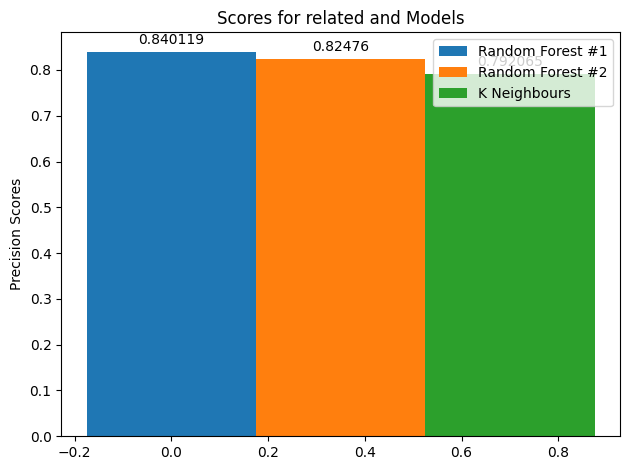

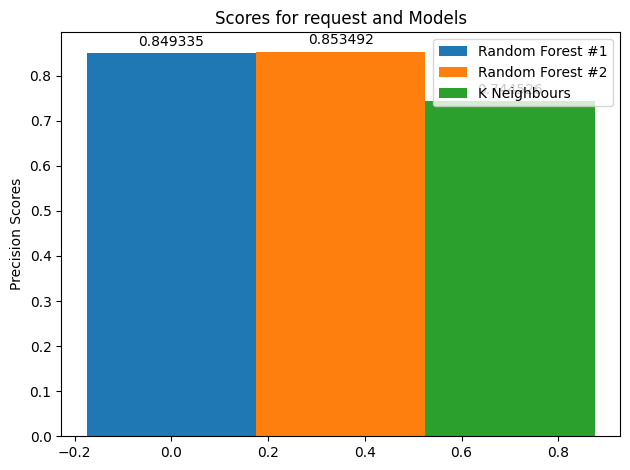

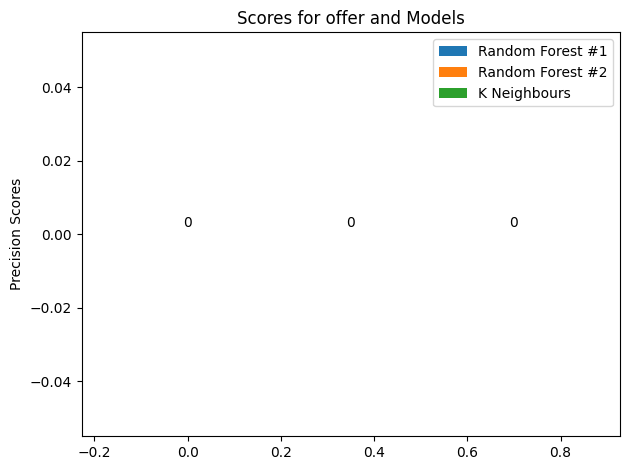

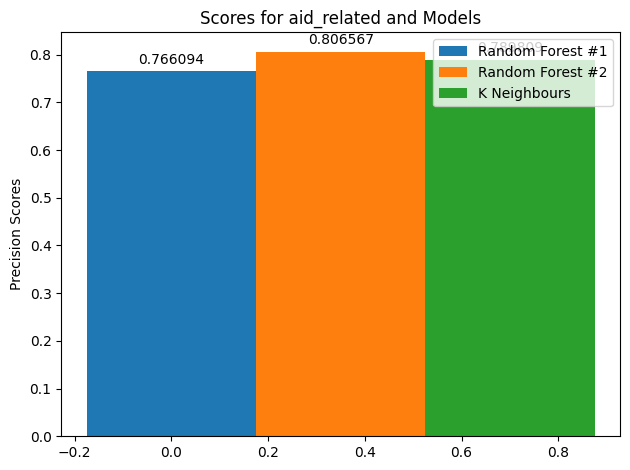

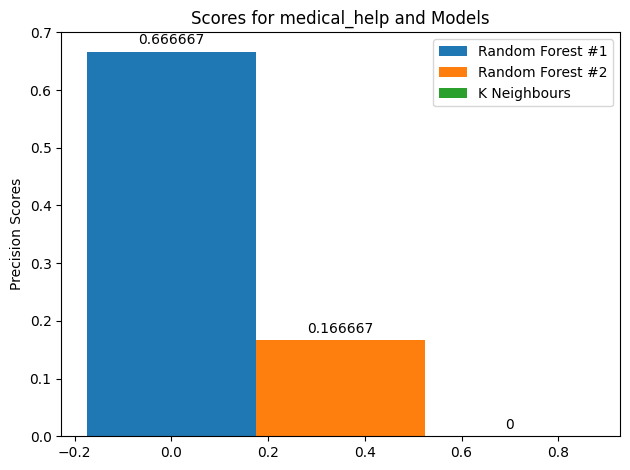

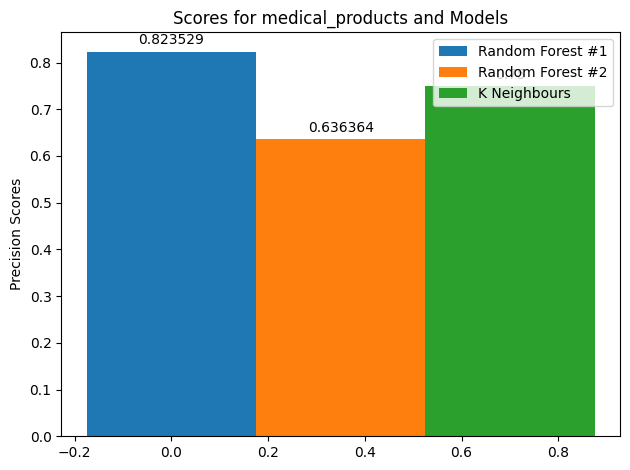

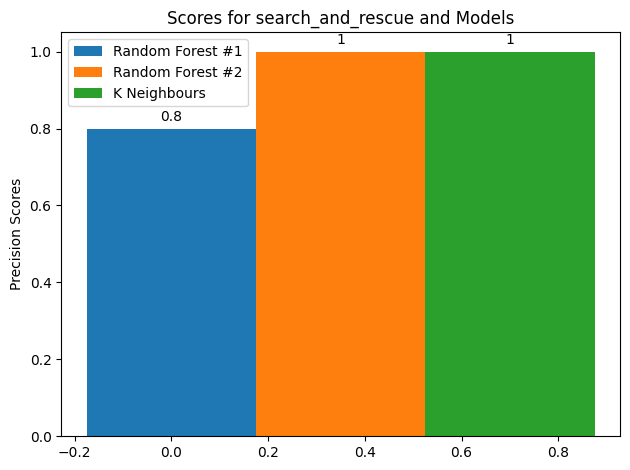

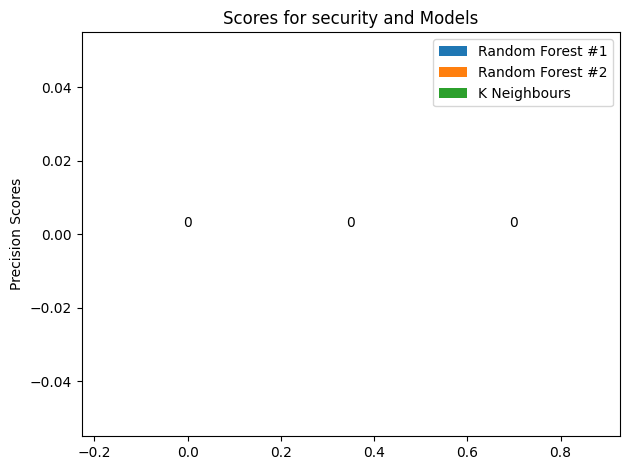

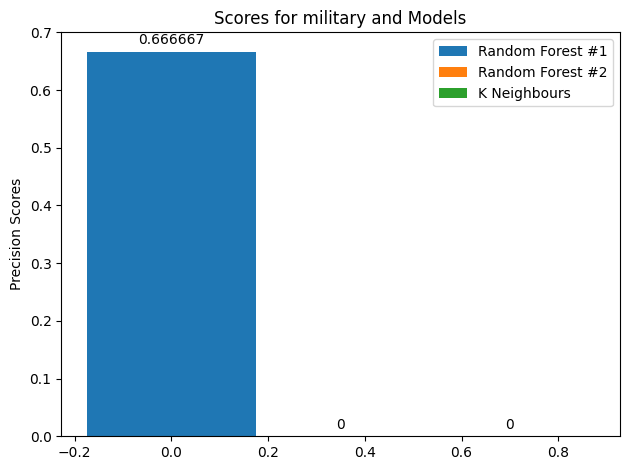

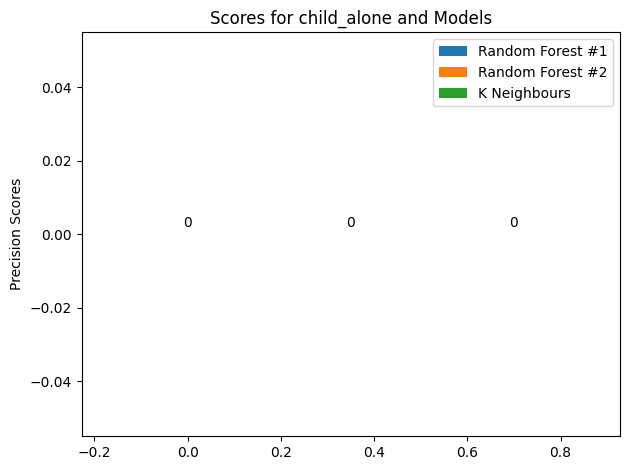

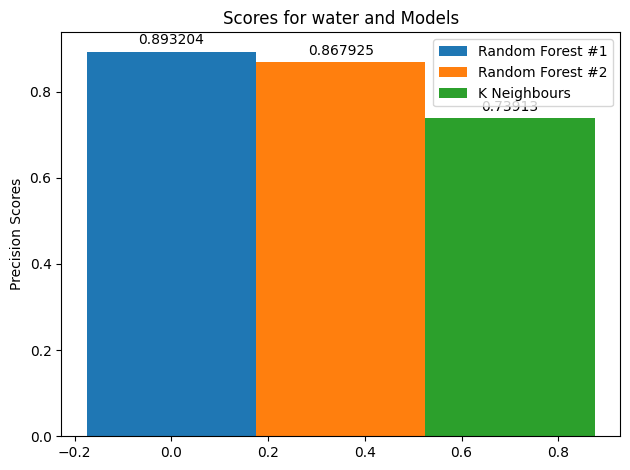

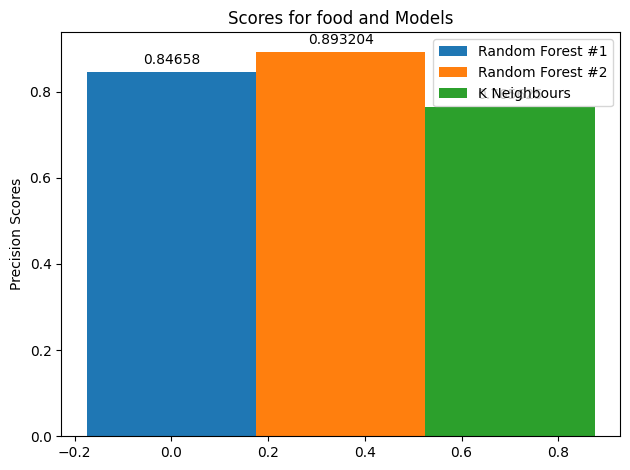

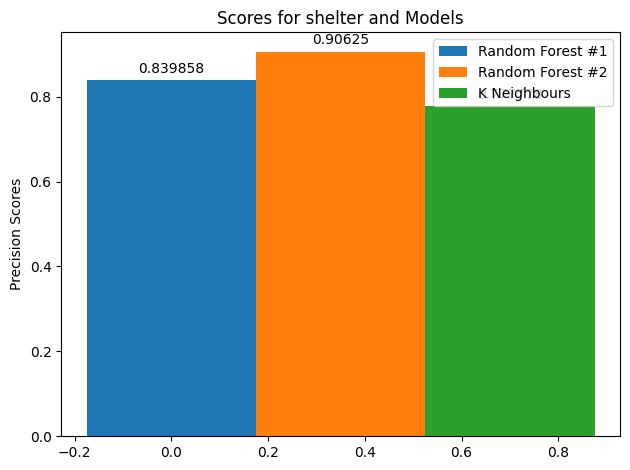

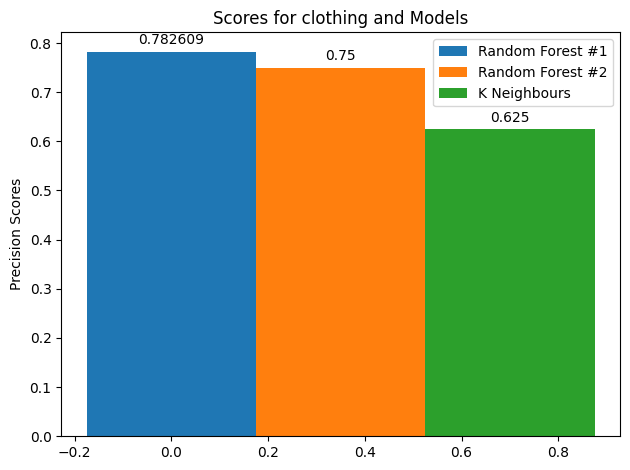

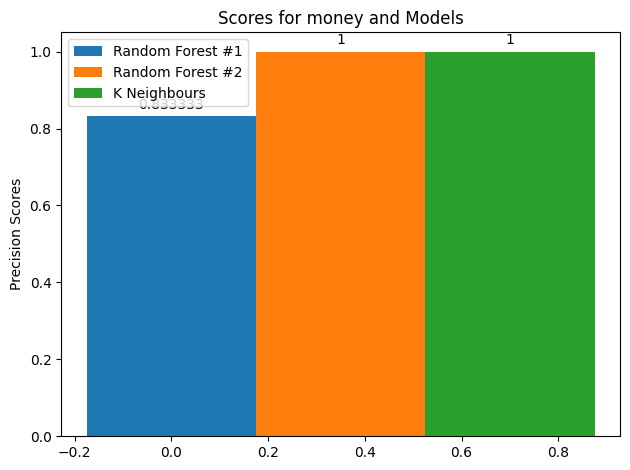

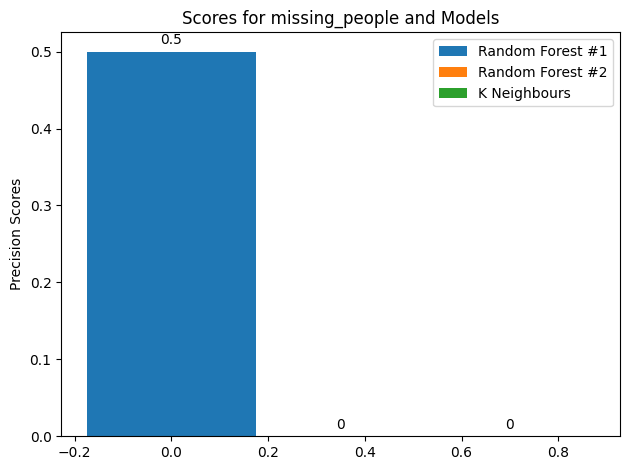

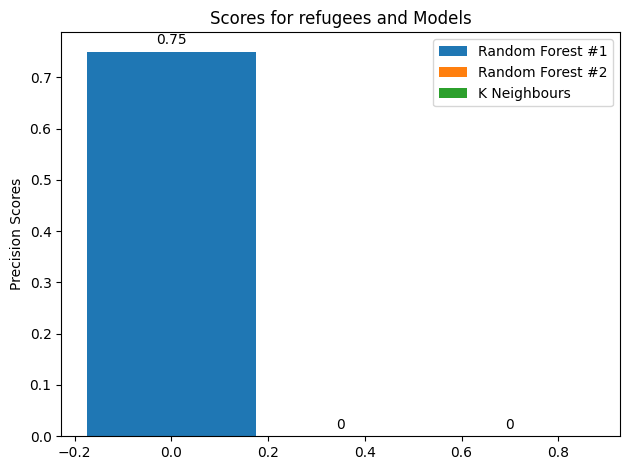

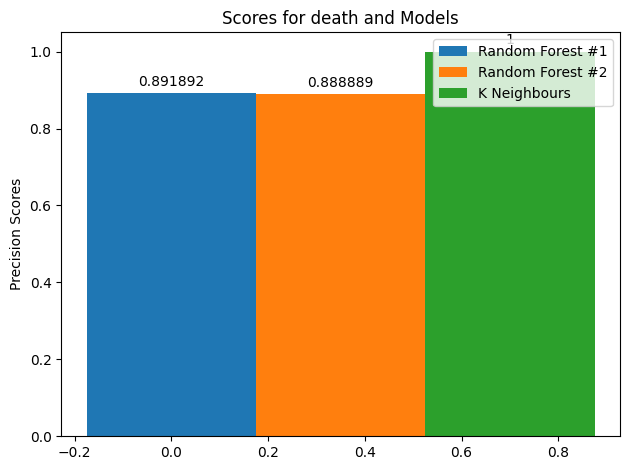

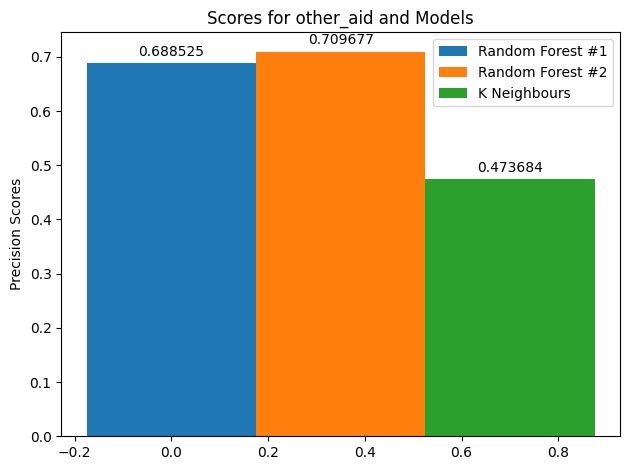

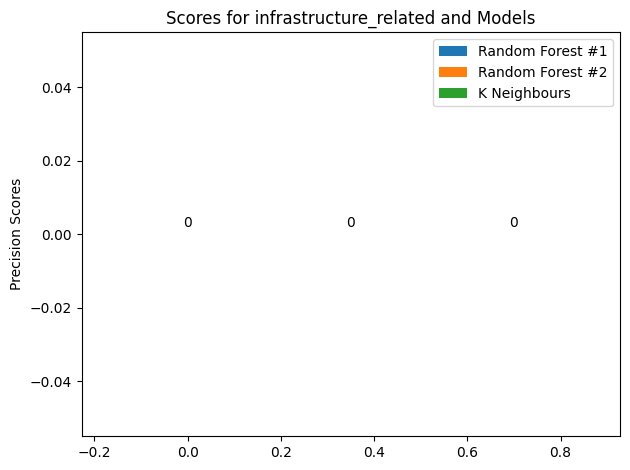

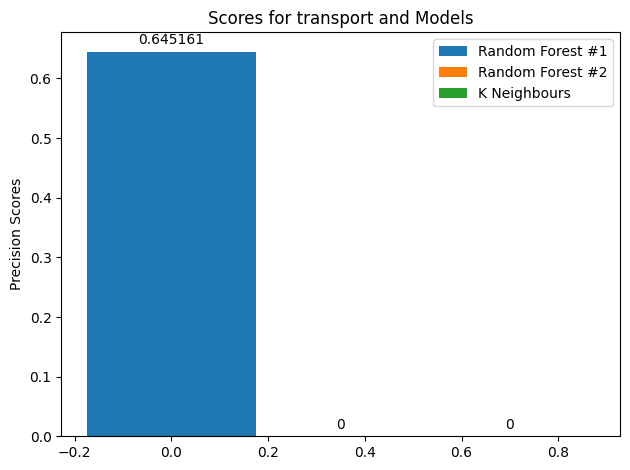

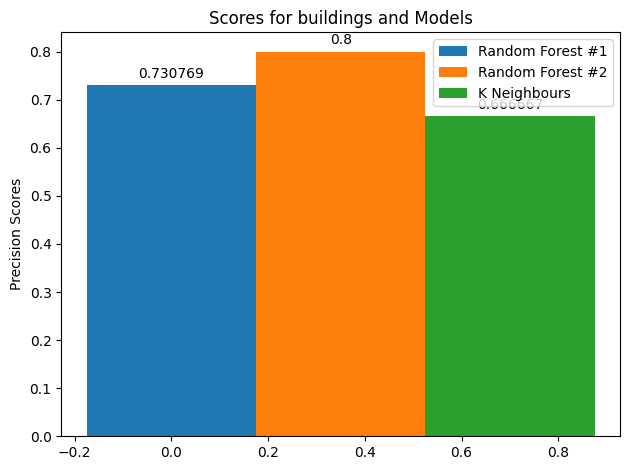

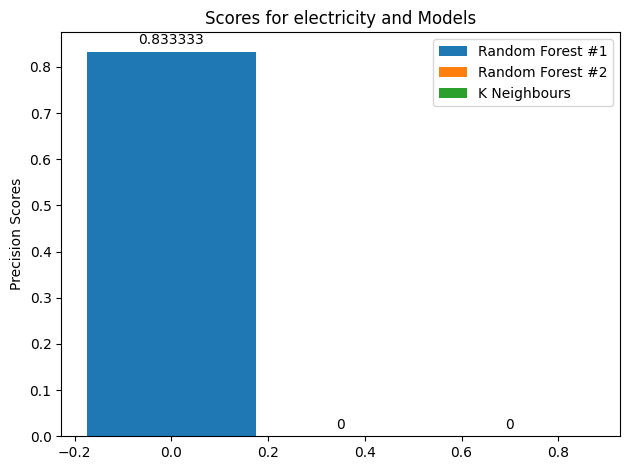

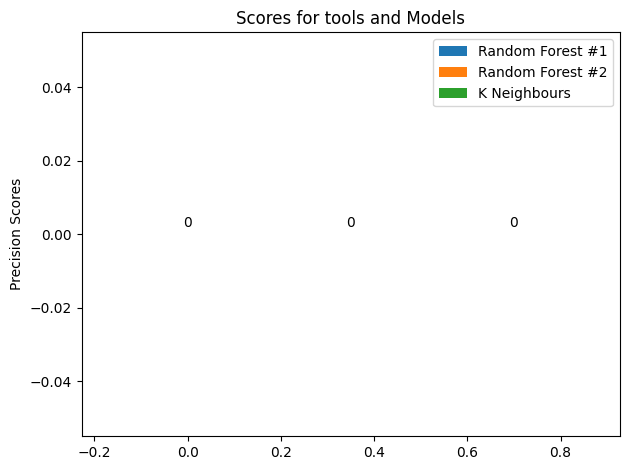

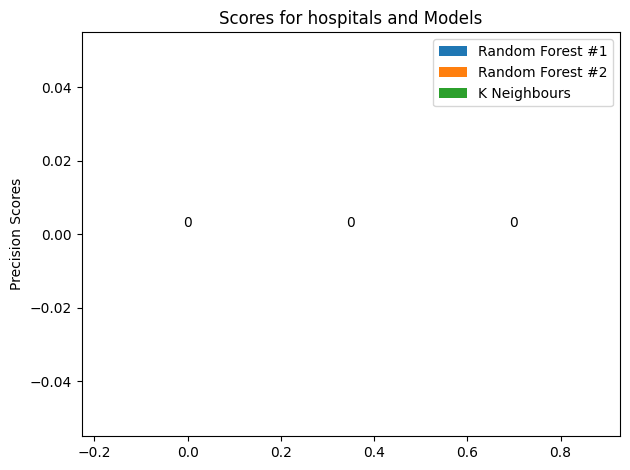

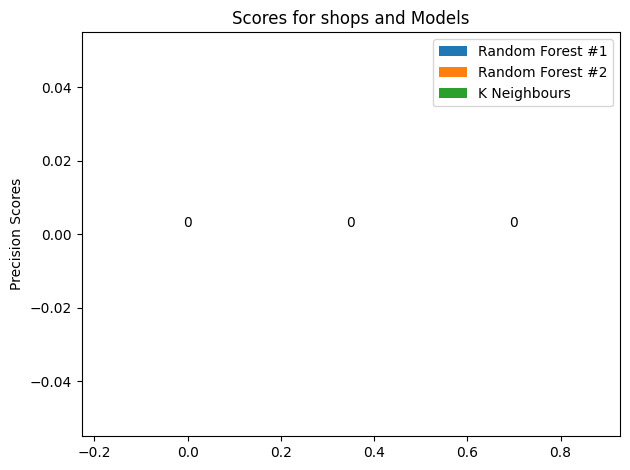

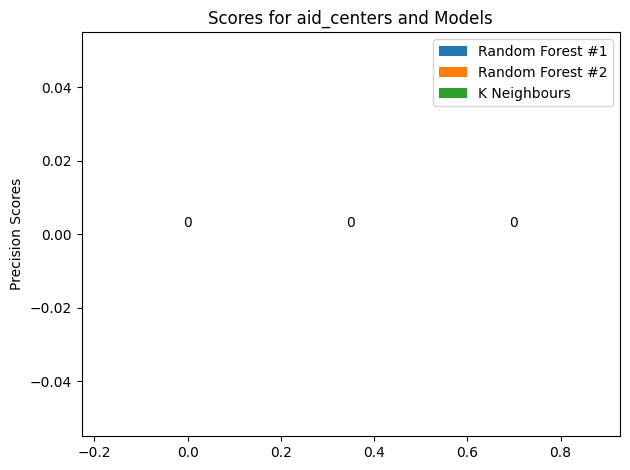

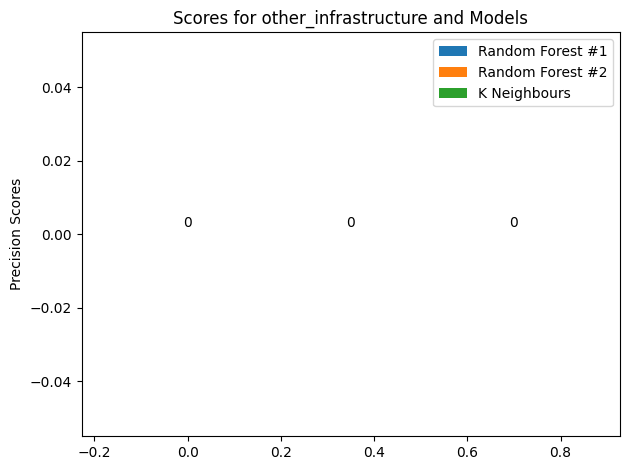

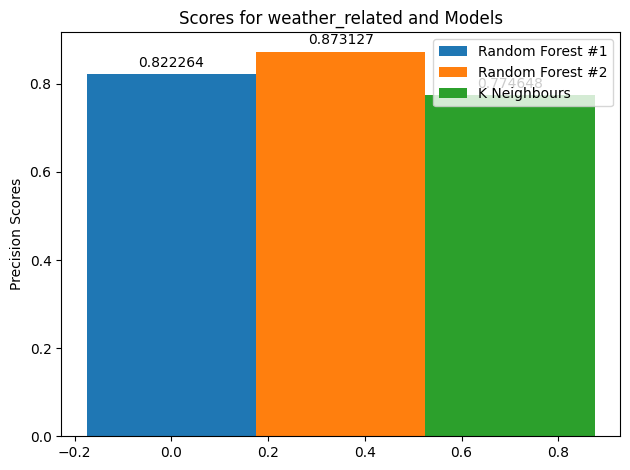

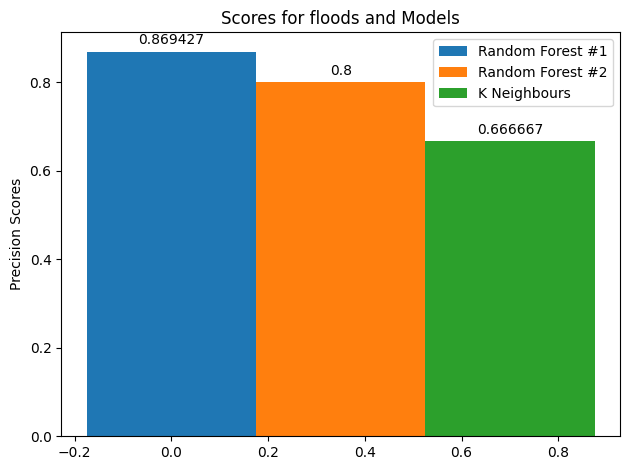

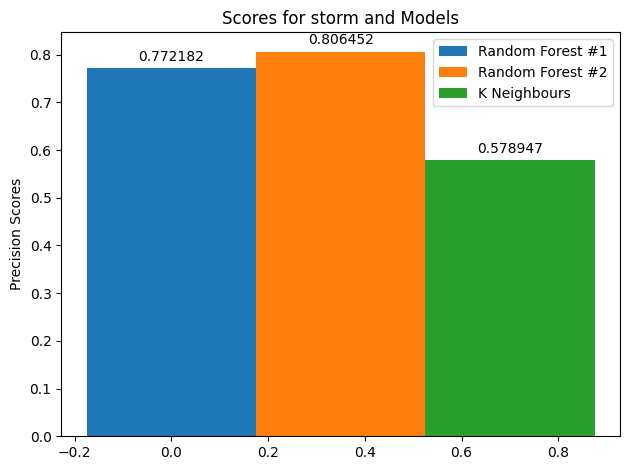

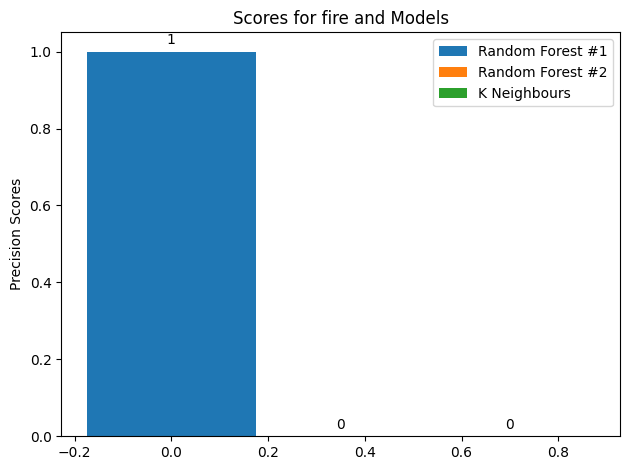

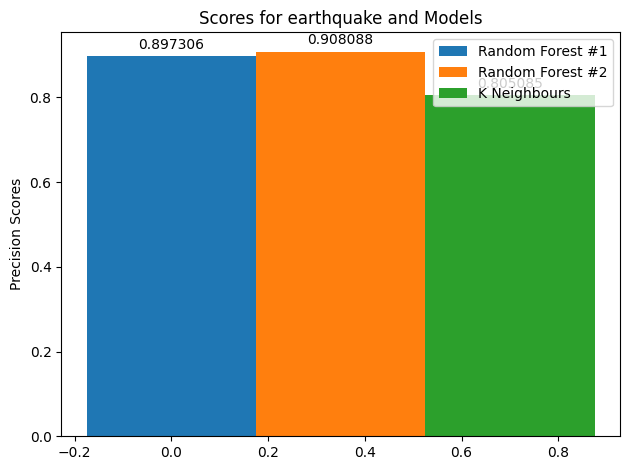

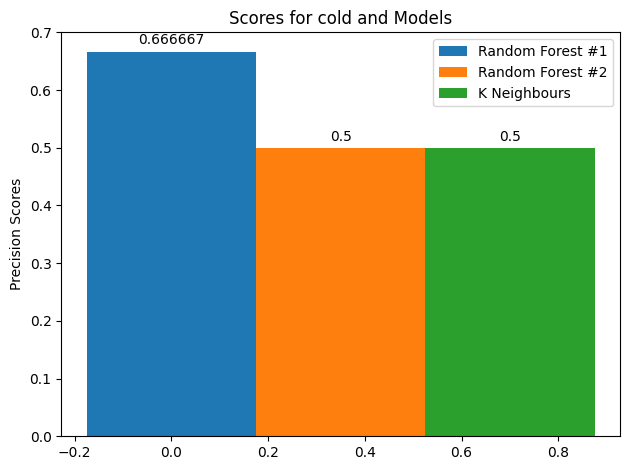

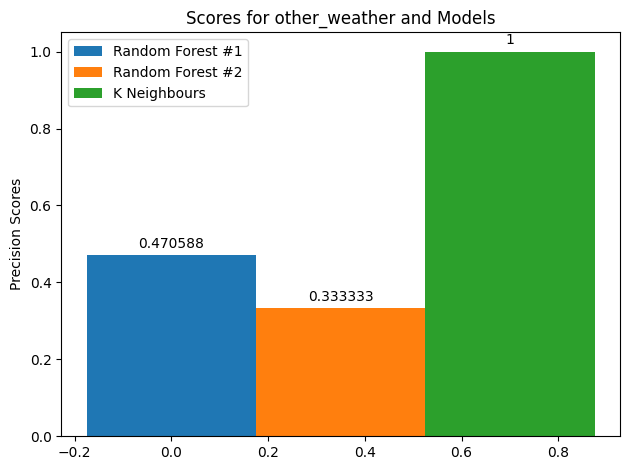

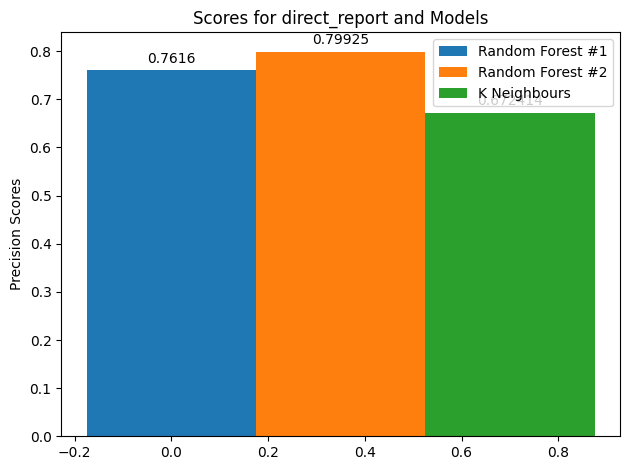

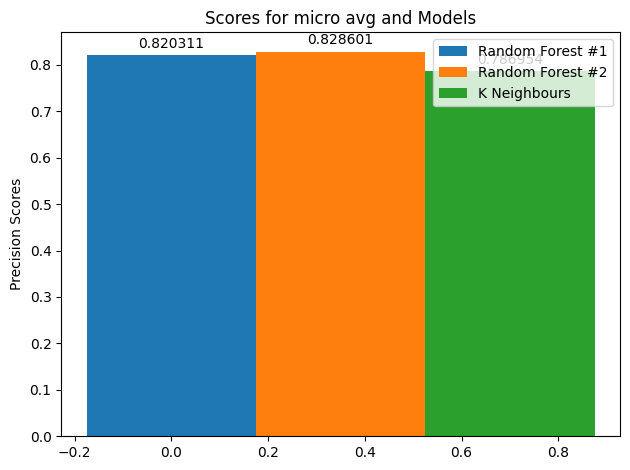

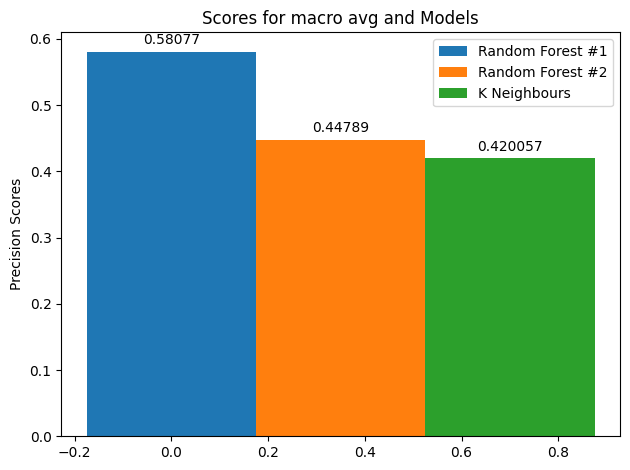

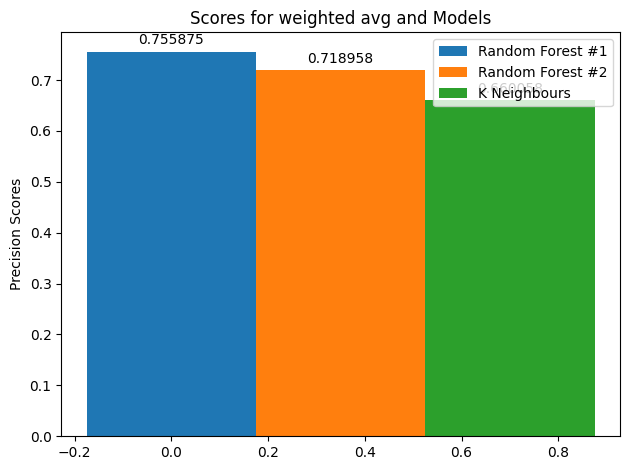

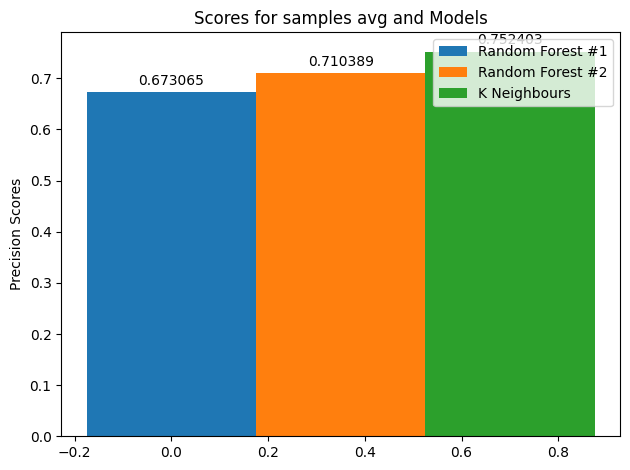

In [69]:

for col in df_compare.index:
    rf1 = df_compare['precision_RF1'][col]
    rf2 = df_compare['precision_RF2'][col]
    kn = df_compare['precision_KN'][col]

    labels = col
    x = np.arange(1)  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, rf1, width, label='Random Forest #1')
    rects2 = ax.bar(x + width, rf2, width, label='Random Forest #2')
    rects3 = ax.bar(x + width*2, kn, width, label='K Neighbours')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Precision Scores')
    ax.set_title('Scores for {} and Models'.format(col))
    #ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)

    fig.tight_layout()

plt.show()

### 9. Export your model as a pickle file

In [70]:
#saving model
pickle.dump(model, open("model_aleaume.pkl", 'wb'))


### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.